## EXP_2389_seq_prune_08_4_128_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [8 2 3 9]
8
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 3s - loss: 0.0915 - accuracy: 0.9645 - val_loss: 0.0454 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.0520 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0564 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0627 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 2s - loss: 2.6265e-05 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9858


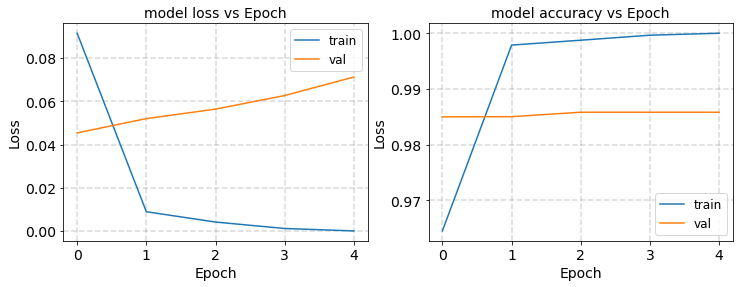

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0894 - accuracy: 0.9790 - val_loss: 0.0391 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 2s - loss: 0.0073 - accuracy: 0.9981 - val_loss: 0.0312 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0426 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 2s - loss: 1.0292e-04 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 3.1717e-05 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 0.9913


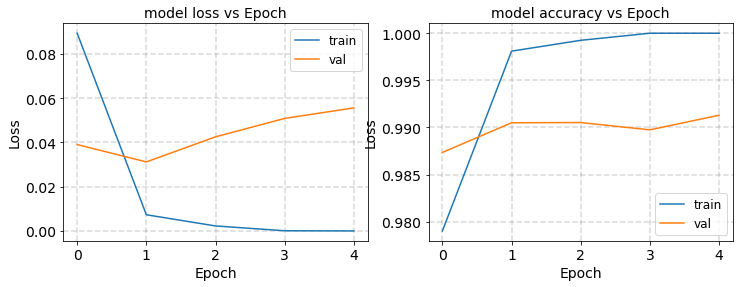

3
Epoch 1/5
1250/1250 - 2s - loss: 0.1083 - accuracy: 0.9757 - val_loss: 0.0556 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 2s - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.0474 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 2s - loss: 8.2539e-04 - accuracy: 0.9999 - val_loss: 0.0436 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 3s - loss: 1.3011e-04 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 4.4482e-05 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9874


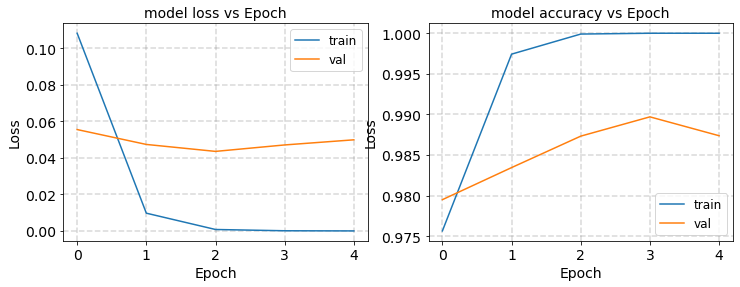

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0625 - accuracy: 0.9864 - val_loss: 0.0466 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0677 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 2s - loss: 6.5404e-04 - accuracy: 0.9999 - val_loss: 0.0727 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 6.4053e-05 - accuracy: 1.0000 - val_loss: 0.0840 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 2.3243e-05 - accuracy: 1.0000 - val_loss: 0.0895 - val_accuracy: 0.9913


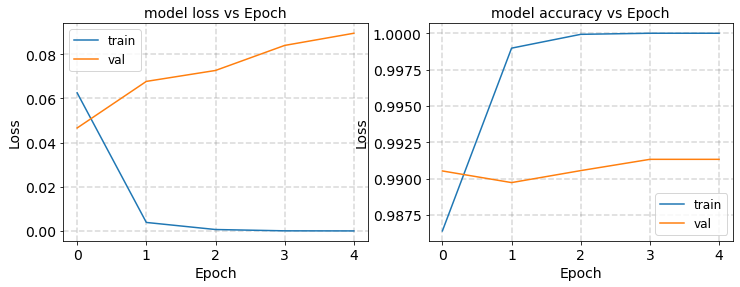

round1 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.1124 - accuracy: 0.9832 - val_loss: 0.0350 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0363 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 1.7914e-04 - accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 4.8265e-05 - accuracy: 1.0000 - val_loss: 0.0534 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 1.8005e-05 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9929


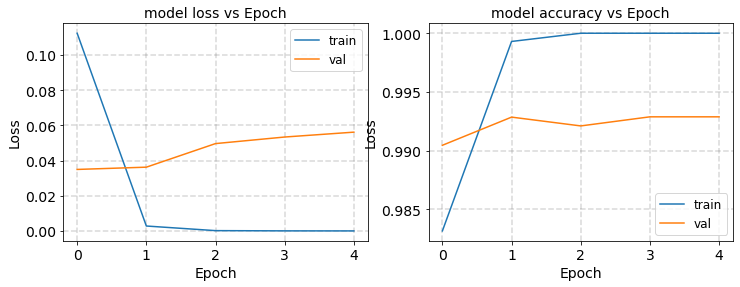

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0818 - accuracy: 0.9846 - val_loss: 0.0485 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0497 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 1.9448e-04 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 5.5737e-05 - accuracy: 1.0000 - val_loss: 0.0729 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 2.0000e-05 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9898


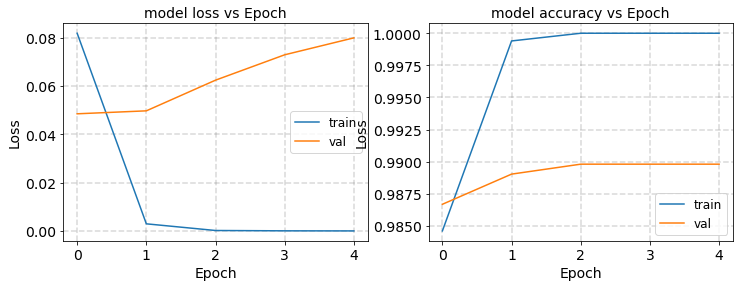

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1102 - accuracy: 0.9752 - val_loss: 0.0591 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0696 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 5.3879e-04 - accuracy: 0.9999 - val_loss: 0.0980 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 3s - loss: 6.9450e-05 - accuracy: 1.0000 - val_loss: 0.1127 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 2.7026e-05 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9850


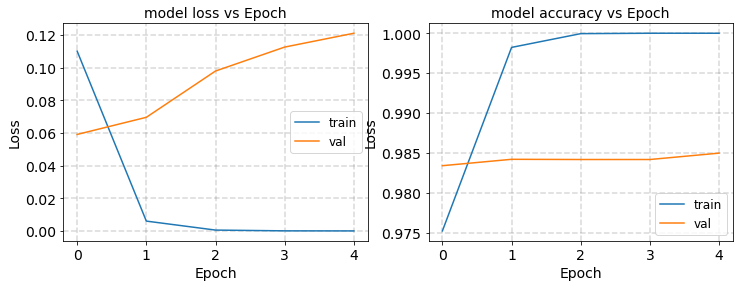

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1114 - accuracy: 0.9746 - val_loss: 0.0822 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0970 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 4s - loss: 7.6233e-04 - accuracy: 0.9998 - val_loss: 0.0996 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 1.0241e-04 - accuracy: 1.0000 - val_loss: 0.1145 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 4s - loss: 3.8607e-05 - accuracy: 1.0000 - val_loss: 0.1238 - val_accuracy: 0.9843


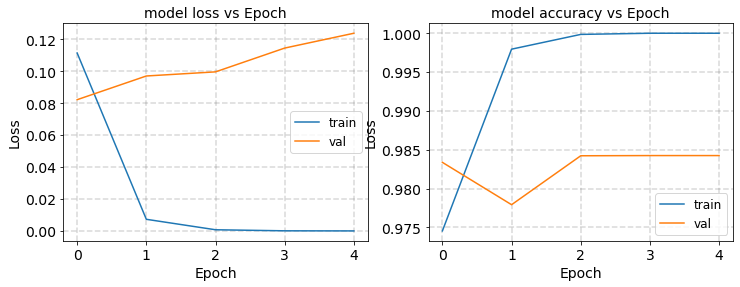

round2 [9 2 3 8]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.0990 - accuracy: 0.9794 - val_loss: 0.0560 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 4s - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0658 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 6.5315e-04 - accuracy: 0.9999 - val_loss: 0.0766 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 4s - loss: 1.1078e-04 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 4s - loss: 3.6578e-05 - accuracy: 1.0000 - val_loss: 0.0944 - val_accuracy: 0.9865


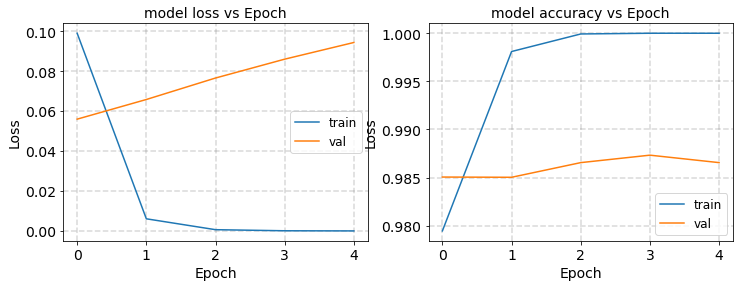

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1247 - accuracy: 0.9799 - val_loss: 0.0484 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 4s - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0554 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 7.3129e-04 - accuracy: 0.9999 - val_loss: 0.0639 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 4s - loss: 1.4806e-04 - accuracy: 1.0000 - val_loss: 0.0736 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 4s - loss: 4.5779e-05 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9905


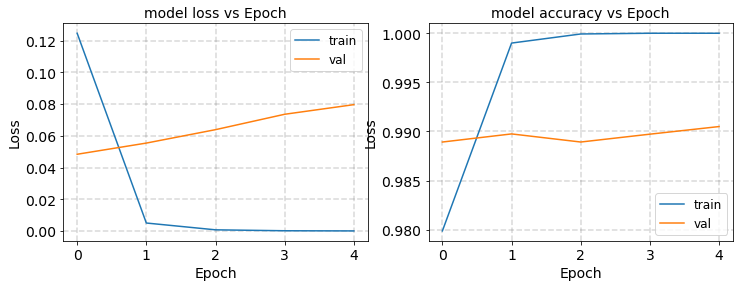

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1309 - accuracy: 0.9692 - val_loss: 0.0578 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 4s - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0513 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0584 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 4s - loss: 6.5528e-04 - accuracy: 0.9998 - val_loss: 0.0832 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 1.5186e-04 - accuracy: 1.0000 - val_loss: 0.0886 - val_accuracy: 0.9833


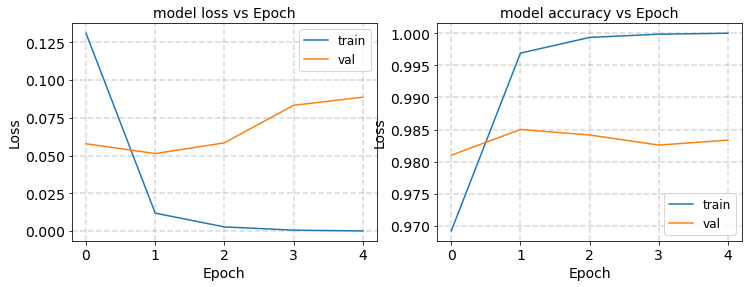

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0984 - accuracy: 0.9782 - val_loss: 0.0606 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 4s - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.0707 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0920 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 4s - loss: 7.5133e-04 - accuracy: 0.9999 - val_loss: 0.1005 - val_accuracy: 0.9802
Epoch 5/5
1250/1250 - 4s - loss: 2.2647e-04 - accuracy: 0.9999 - val_loss: 0.1108 - val_accuracy: 0.9834


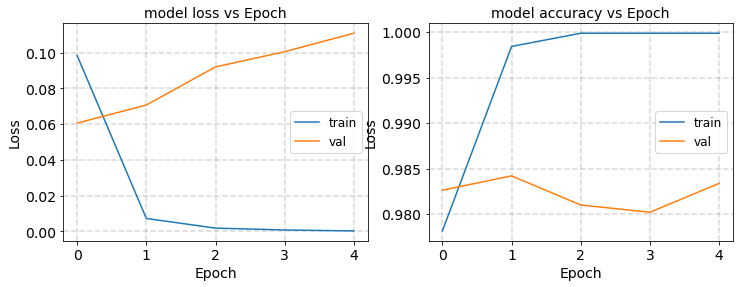

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_2  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 128)               32898     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

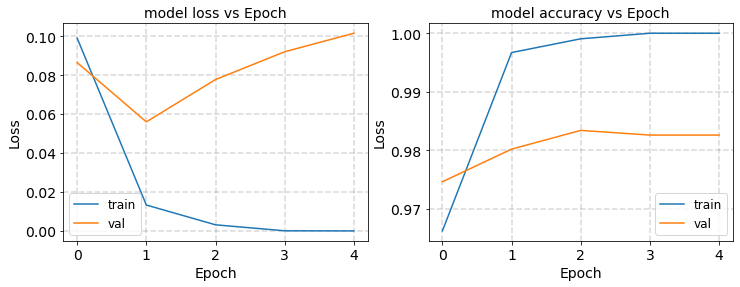

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0789 - accuracy: 0.9813 - val_loss: 0.0541 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 4s - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0560 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 5s - loss: 8.3014e-04 - accuracy: 0.9999 - val_loss: 0.0797 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 7.0172e-05 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 1.6797e-05 - accuracy: 1.0000 - val_loss: 0.1049 - val_accuracy: 0.9850


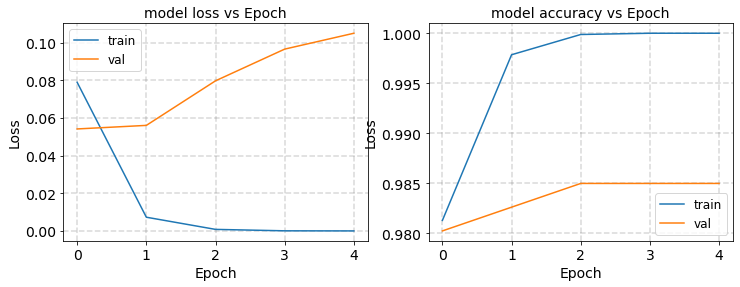

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1355 - accuracy: 0.9747 - val_loss: 0.0462 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0460 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 6.1895e-04 - accuracy: 0.9999 - val_loss: 0.0483 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 5s - loss: 9.2900e-05 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 5s - loss: 3.1608e-05 - accuracy: 1.0000 - val_loss: 0.0601 - val_accuracy: 0.9897


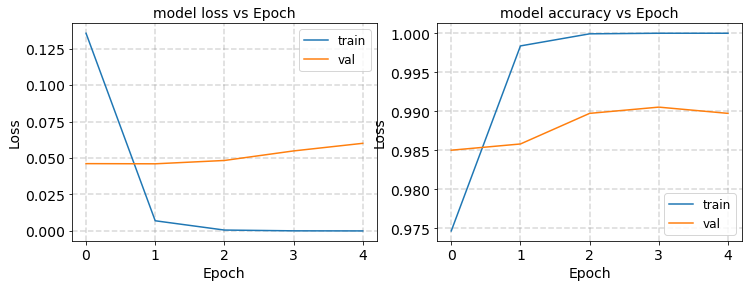

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0949 - accuracy: 0.9772 - val_loss: 0.0590 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 4s - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0614 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 5s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0760 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 5.1786e-04 - accuracy: 0.9999 - val_loss: 0.0837 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 3.1525e-05 - accuracy: 1.0000 - val_loss: 0.0900 - val_accuracy: 0.9866


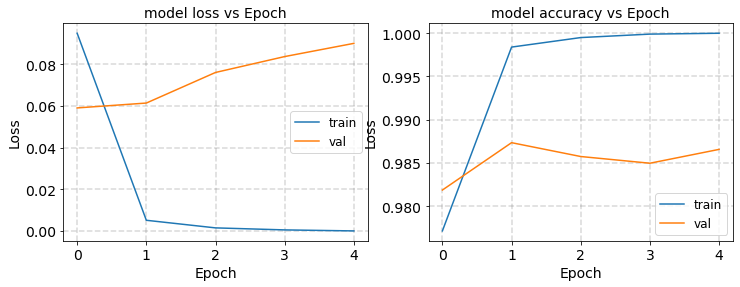

round1 [2 3 8 9]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0718 - accuracy: 0.9852 - val_loss: 0.0500 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 5.6504e-04 - accuracy: 1.0000 - val_loss: 0.0593 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 6.3727e-05 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 1.9768e-05 - accuracy: 1.0000 - val_loss: 0.0747 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 8.2987e-06 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9890


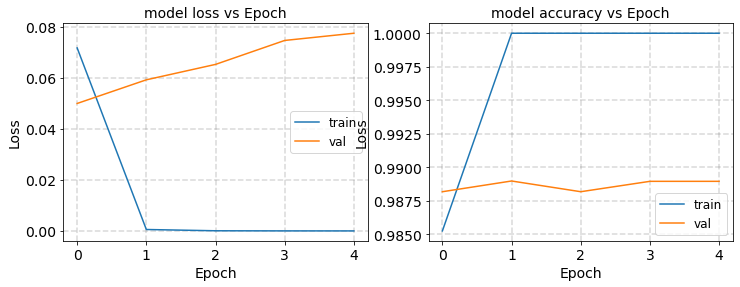

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1273 - accuracy: 0.9743 - val_loss: 0.0724 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 4s - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.0828 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1137 - val_accuracy: 0.9802
Epoch 4/5
1250/1250 - 4s - loss: 2.5089e-04 - accuracy: 1.0000 - val_loss: 0.1226 - val_accuracy: 0.9794
Epoch 5/5
1250/1250 - 4s - loss: 8.2071e-05 - accuracy: 1.0000 - val_loss: 0.1389 - val_accuracy: 0.9794


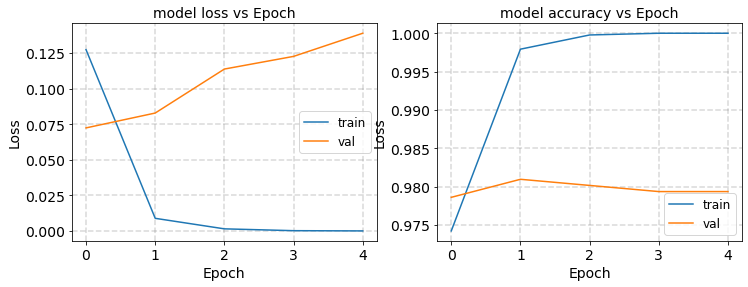

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1138 - accuracy: 0.9772 - val_loss: 0.0523 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.0956 - val_accuracy: 0.9786
Epoch 3/5
1250/1250 - 5s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0768 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 1.6928e-04 - accuracy: 1.0000 - val_loss: 0.0944 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 4.3860e-05 - accuracy: 1.0000 - val_loss: 0.1065 - val_accuracy: 0.9873


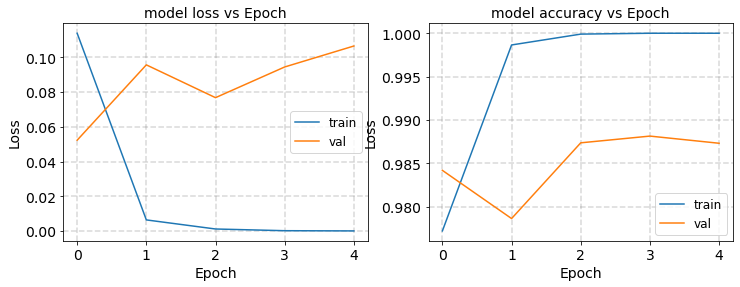

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0984 - accuracy: 0.9834 - val_loss: 0.0492 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0705 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 8.4396e-04 - accuracy: 1.0000 - val_loss: 0.0807 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 3s - loss: 1.8232e-04 - accuracy: 1.0000 - val_loss: 0.0950 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 6.4002e-05 - accuracy: 1.0000 - val_loss: 0.1058 - val_accuracy: 0.9866


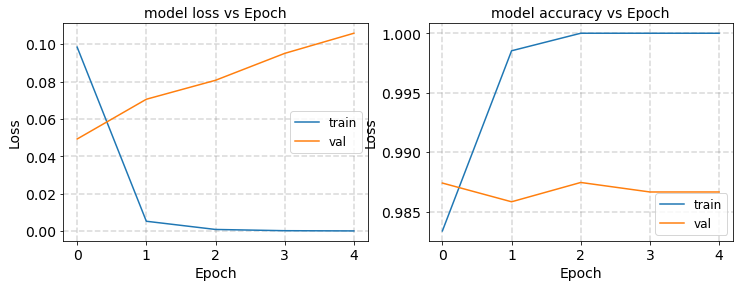

round2 [3 8 2 9]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.1177 - accuracy: 0.9727 - val_loss: 0.0737 - val_accuracy: 0.9764
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.1048 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 3s - loss: 3.9601e-04 - accuracy: 1.0000 - val_loss: 0.1265 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 3s - loss: 9.9922e-05 - accuracy: 1.0000 - val_loss: 0.1390 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 3s - loss: 3.5746e-05 - accuracy: 1.0000 - val_loss: 0.1601 - val_accuracy: 0.9818


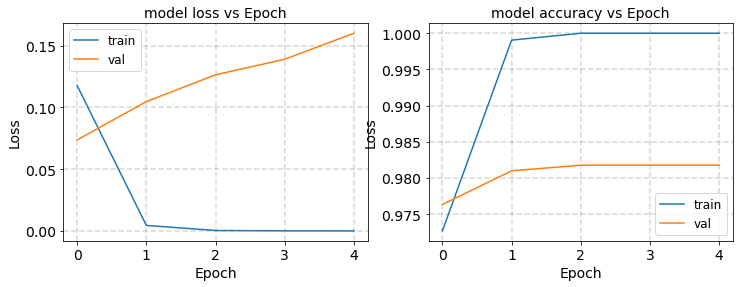

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0881 - accuracy: 0.9823 - val_loss: 0.0589 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0750 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 2.4455e-04 - accuracy: 1.0000 - val_loss: 0.0852 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 8.3171e-05 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 3.3673e-05 - accuracy: 1.0000 - val_loss: 0.1006 - val_accuracy: 0.9858


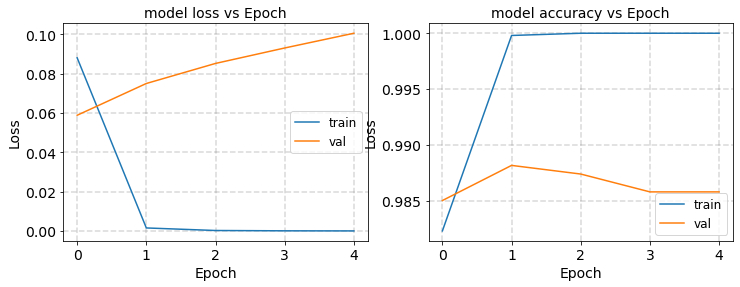

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1145 - accuracy: 0.9772 - val_loss: 0.0387 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 3s - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.0452 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 4s - loss: 6.9013e-04 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 1.0876e-04 - accuracy: 1.0000 - val_loss: 0.0598 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 2.9552e-05 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy: 0.9913


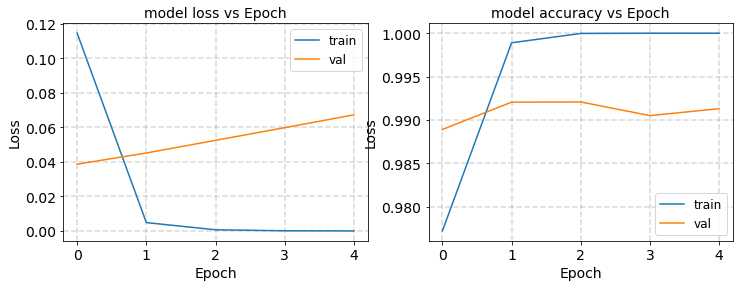

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1354 - accuracy: 0.9740 - val_loss: 0.0571 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 3s - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0632 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 2.6608e-04 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 9.2738e-05 - accuracy: 1.0000 - val_loss: 0.0854 - val_accuracy: 0.9874


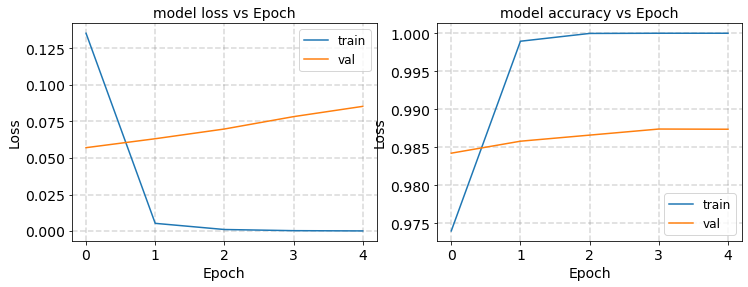

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_6  (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_7  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 128)               32898     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

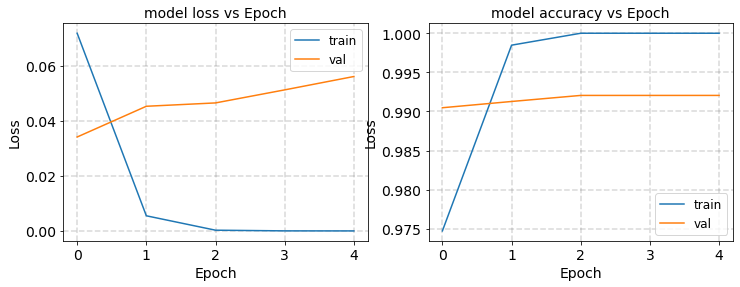

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1203 - accuracy: 0.9667 - val_loss: 0.0687 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 5s - loss: 0.0127 - accuracy: 0.9964 - val_loss: 0.0937 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 5s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.1066 - val_accuracy: 0.9787
Epoch 4/5
1250/1250 - 5s - loss: 1.4819e-04 - accuracy: 1.0000 - val_loss: 0.1183 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 4s - loss: 5.4044e-05 - accuracy: 1.0000 - val_loss: 0.1299 - val_accuracy: 0.9779


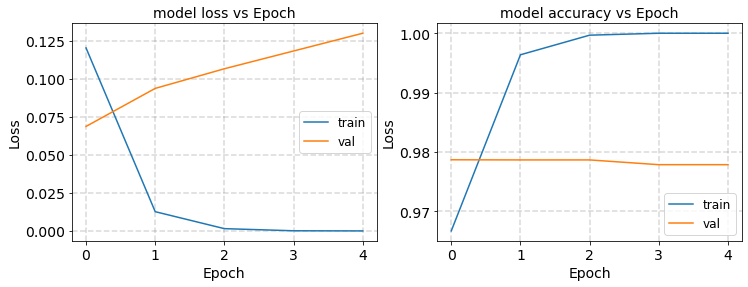

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0711 - accuracy: 0.9852 - val_loss: 0.0549 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 4s - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0520 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0578 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 5s - loss: 9.2845e-05 - accuracy: 1.0000 - val_loss: 0.0646 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 6s - loss: 2.7003e-05 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9905


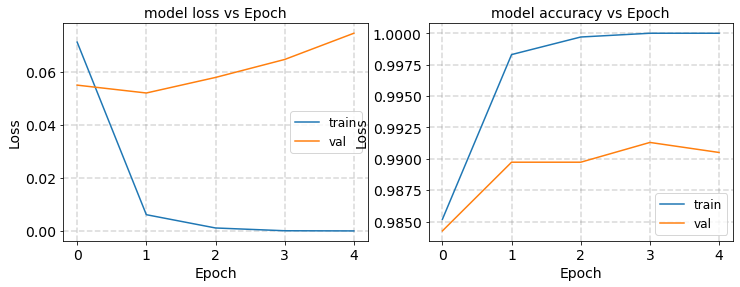

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0993 - accuracy: 0.9773 - val_loss: 0.0599 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 4s - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.0849 - val_accuracy: 0.9803
Epoch 3/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0786 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 5s - loss: 1.5388e-04 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 5s - loss: 4.9983e-05 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 0.9826


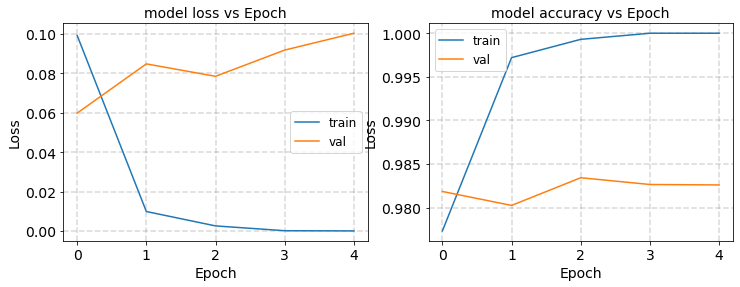

round1 [2 8 3 9]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.0845 - accuracy: 0.9815 - val_loss: 0.0581 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0059 - accuracy: 0.9988 - val_loss: 0.0535 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0527 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 1.8115e-04 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 5s - loss: 4.7395e-05 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9905


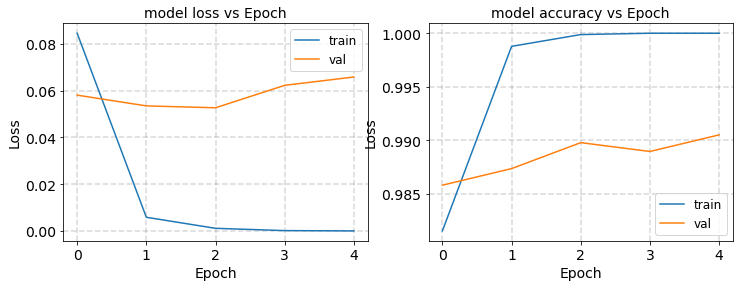

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1041 - accuracy: 0.9764 - val_loss: 0.0596 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 5s - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0675 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 5s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0751 - val_accuracy: 0.9827
Epoch 4/5
1250/1250 - 5s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0870 - val_accuracy: 0.9835
Epoch 5/5
1250/1250 - 5s - loss: 3.0151e-04 - accuracy: 0.9999 - val_loss: 0.0867 - val_accuracy: 0.9866


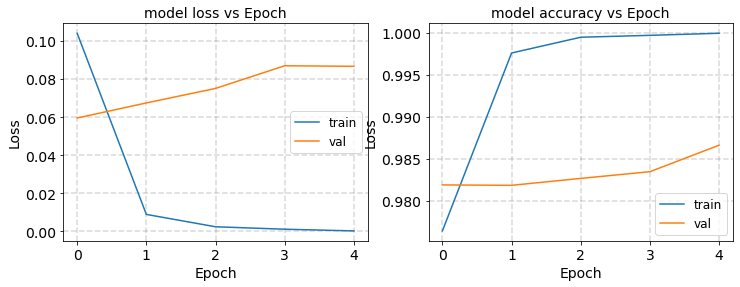

3
Epoch 1/5
1250/1250 - 5s - loss: 0.0994 - accuracy: 0.9796 - val_loss: 0.0539 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 5s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0627 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 5s - loss: 2.7787e-04 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 7.0522e-05 - accuracy: 1.0000 - val_loss: 0.0865 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 2.6519e-05 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 0.9882


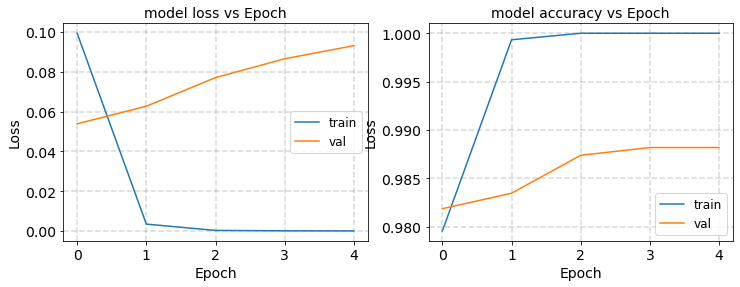

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0872 - accuracy: 0.9845 - val_loss: 0.0659 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0961 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 1.5602e-04 - accuracy: 1.0000 - val_loss: 0.1209 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 4s - loss: 3.1485e-05 - accuracy: 1.0000 - val_loss: 0.1315 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 5s - loss: 1.2115e-05 - accuracy: 1.0000 - val_loss: 0.1392 - val_accuracy: 0.9858


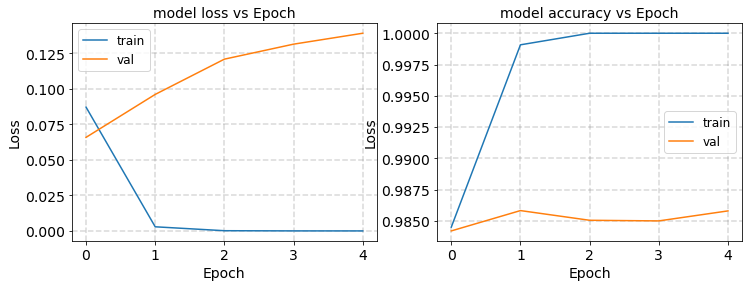

round2 [9 2 3 8]
9
Epoch 1/5
1250/1250 - 5s - loss: 5.3894e-06 - accuracy: 1.0000 - val_loss: 0.1453 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 2.5367e-06 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 1.2133e-06 - accuracy: 1.0000 - val_loss: 0.1582 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 4s - loss: 6.0354e-07 - accuracy: 1.0000 - val_loss: 0.1644 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 3.0102e-07 - accuracy: 1.0000 - val_loss: 0.1720 - val_accuracy: 0.9858


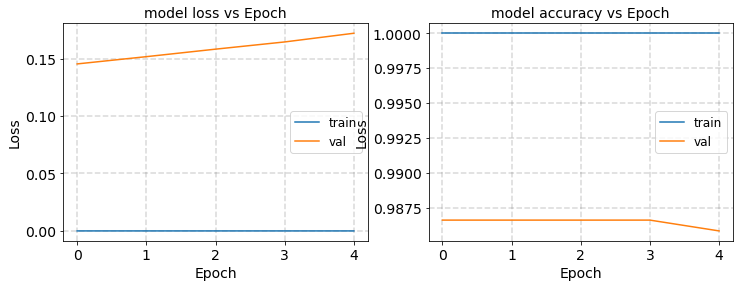

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1899 - accuracy: 0.9706 - val_loss: 0.0625 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 5s - loss: 0.0128 - accuracy: 0.9965 - val_loss: 0.0676 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 4s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0728 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 6.2095e-04 - accuracy: 0.9999 - val_loss: 0.0820 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 8.9161e-05 - accuracy: 1.0000 - val_loss: 0.0905 - val_accuracy: 0.9866


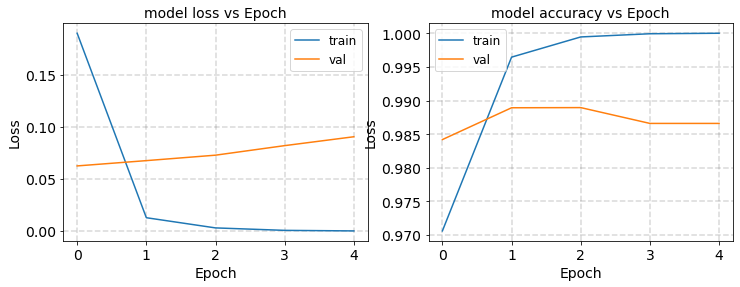

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1482 - accuracy: 0.9630 - val_loss: 0.0428 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0484 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0571 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 1.1771e-04 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 2.6414e-05 - accuracy: 1.0000 - val_loss: 0.0840 - val_accuracy: 0.9850


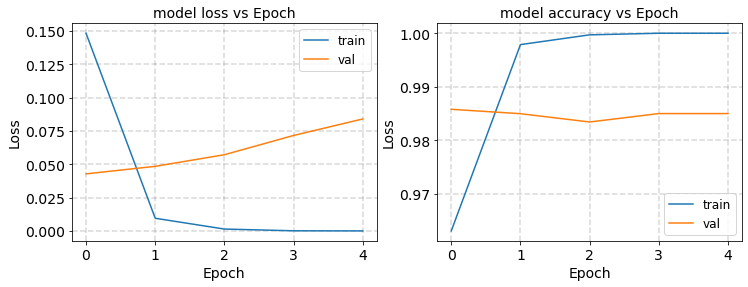

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1557 - accuracy: 0.9646 - val_loss: 0.0527 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0521 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0566 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 4.5916e-04 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 1.0352e-04 - accuracy: 1.0000 - val_loss: 0.0737 - val_accuracy: 0.9873


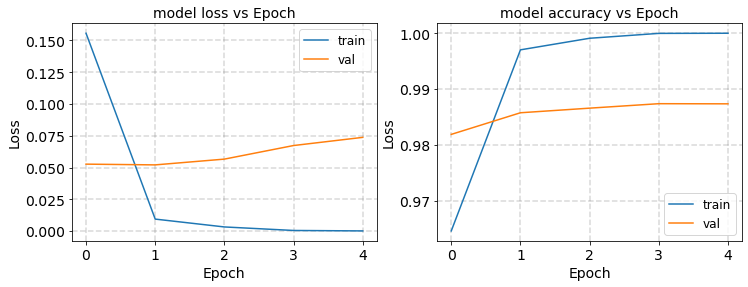

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_12 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_14 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_15 (None, 128)               32898     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

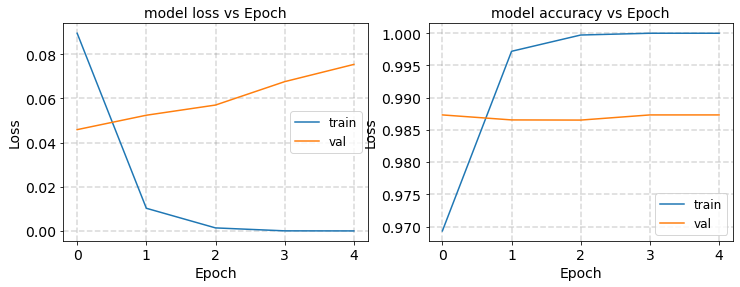

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0801 - accuracy: 0.9809 - val_loss: 0.0452 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0593 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0674 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 7.3168e-05 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 2.8347e-05 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 0.9898


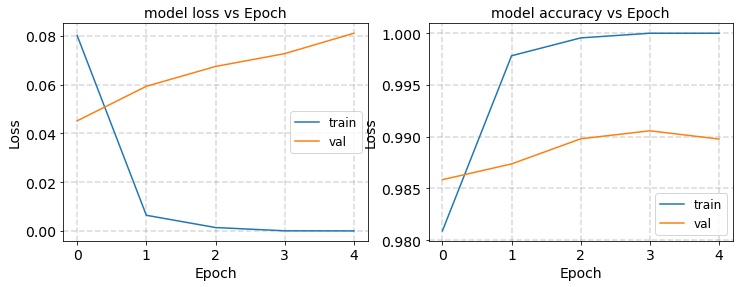

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1055 - accuracy: 0.9745 - val_loss: 0.0508 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 4s - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.0489 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 5.3902e-04 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 5s - loss: 1.2528e-04 - accuracy: 1.0000 - val_loss: 0.0646 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 4s - loss: 3.9394e-05 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9866


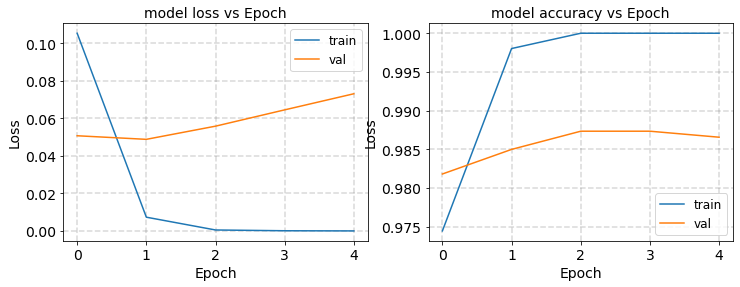

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0744 - accuracy: 0.9837 - val_loss: 0.0367 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 4s - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0481 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 7.3066e-04 - accuracy: 0.9998 - val_loss: 0.0572 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 4s - loss: 5.0671e-05 - accuracy: 1.0000 - val_loss: 0.0634 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 1.2616e-05 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9905


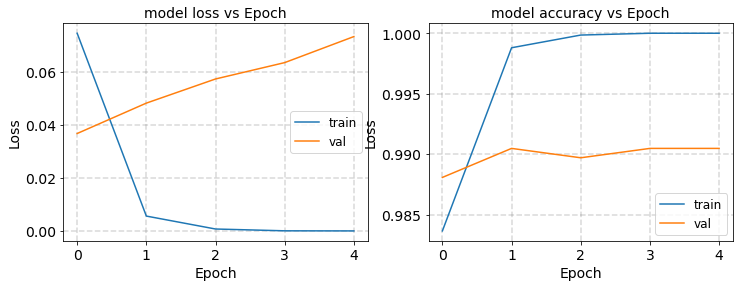

round1 [3 8 2 9]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.1216 - accuracy: 0.9729 - val_loss: 0.0660 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 4s - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0859 - val_accuracy: 0.9795
Epoch 3/5
1250/1250 - 4s - loss: 3.1210e-04 - accuracy: 1.0000 - val_loss: 0.0929 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 4s - loss: 6.5564e-05 - accuracy: 1.0000 - val_loss: 0.0999 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 6s - loss: 2.7024e-05 - accuracy: 1.0000 - val_loss: 0.1099 - val_accuracy: 0.9826


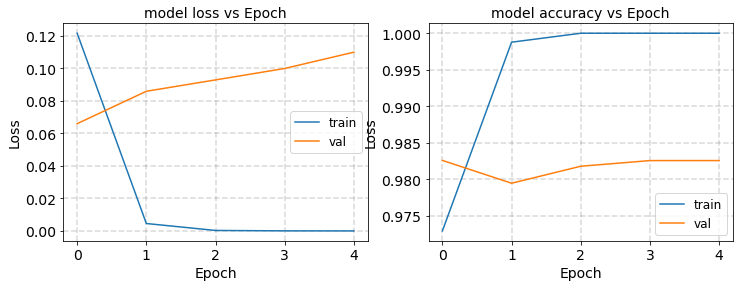

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0967 - accuracy: 0.9779 - val_loss: 0.0490 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 4s - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0785 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 4s - loss: 4.6518e-04 - accuracy: 0.9999 - val_loss: 0.1069 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 5.1991e-05 - accuracy: 1.0000 - val_loss: 0.1129 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 2.2551e-05 - accuracy: 1.0000 - val_loss: 0.1216 - val_accuracy: 0.9850


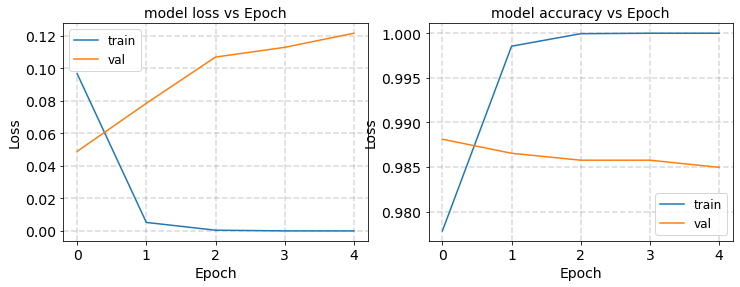

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0880 - accuracy: 0.9843 - val_loss: 0.0449 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0528 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 2.7549e-04 - accuracy: 1.0000 - val_loss: 0.0543 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 6s - loss: 6.2832e-05 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 2.2381e-05 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9929


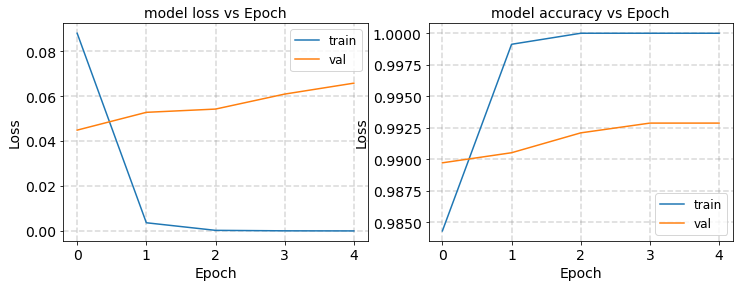

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1019 - accuracy: 0.9797 - val_loss: 0.0568 - val_accuracy: 0.9833
Epoch 2/5
1250/1250 - 4s - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.0592 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0650 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 4s - loss: 1.7433e-04 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 4.6758e-05 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9866


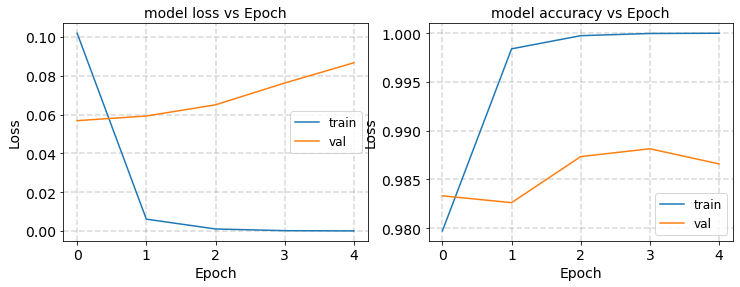

round2 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 4s - loss: 1.5617e-05 - accuracy: 1.0000 - val_loss: 0.0955 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 4s - loss: 4.9908e-06 - accuracy: 1.0000 - val_loss: 0.1067 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 1.9154e-06 - accuracy: 1.0000 - val_loss: 0.1143 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 8.3313e-07 - accuracy: 1.0000 - val_loss: 0.1225 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 3.9075e-07 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9874


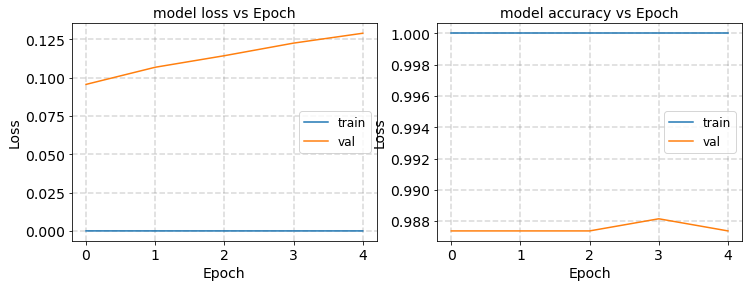

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1466 - accuracy: 0.9708 - val_loss: 0.0672 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 4s - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0631 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0770 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 3.3678e-04 - accuracy: 1.0000 - val_loss: 0.0899 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 4s - loss: 9.9445e-05 - accuracy: 1.0000 - val_loss: 0.0999 - val_accuracy: 0.9858


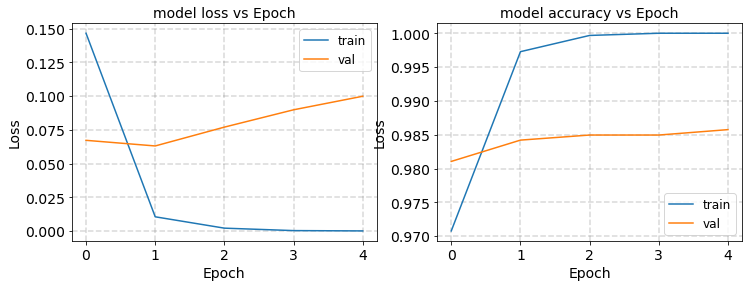

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1151 - accuracy: 0.9762 - val_loss: 0.0690 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0076 - accuracy: 0.9982 - val_loss: 0.0753 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 5s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0866 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 5s - loss: 1.5444e-04 - accuracy: 1.0000 - val_loss: 0.0978 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 5.1968e-05 - accuracy: 1.0000 - val_loss: 0.1088 - val_accuracy: 0.9866


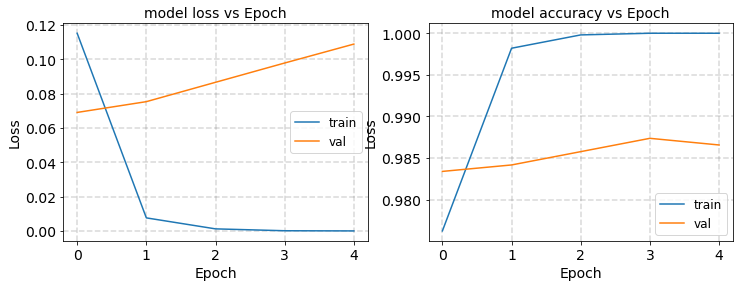

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1219 - accuracy: 0.9717 - val_loss: 0.0652 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 4s - loss: 0.0239 - accuracy: 0.9919 - val_loss: 0.0426 - val_accuracy: 0.9888
Epoch 3/5
1250/1250 - 4s - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0386 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0433 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 5.2968e-04 - accuracy: 0.9999 - val_loss: 0.0508 - val_accuracy: 0.9929


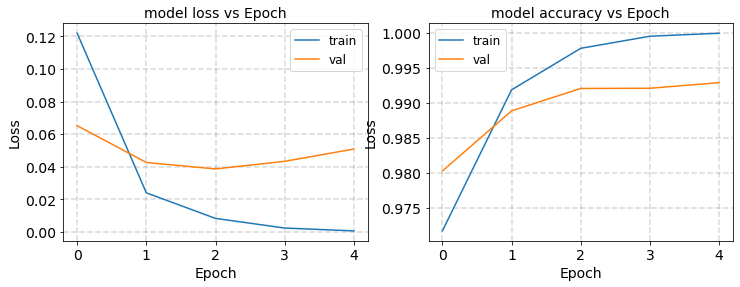

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_18 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_19 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_20 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_21 (None, 128)               32898     
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

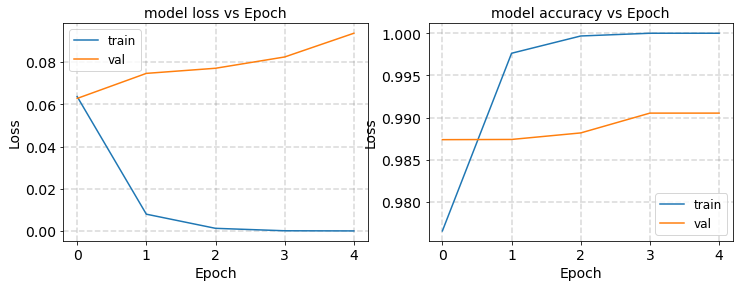

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1126 - accuracy: 0.9665 - val_loss: 0.0609 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.0671 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0812 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 1.4090e-04 - accuracy: 1.0000 - val_loss: 0.0938 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 4.4158e-05 - accuracy: 1.0000 - val_loss: 0.1027 - val_accuracy: 0.9850


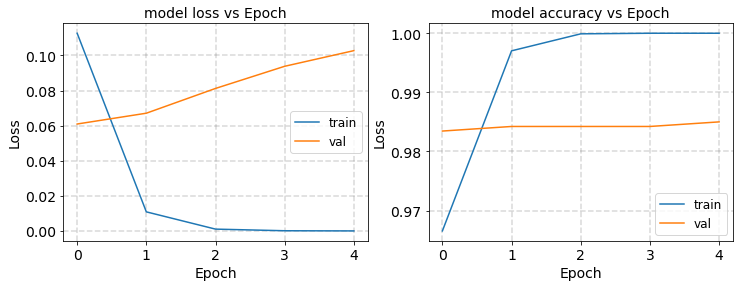

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0900 - accuracy: 0.9804 - val_loss: 0.0414 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 4s - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0436 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 4.4904e-04 - accuracy: 0.9999 - val_loss: 0.0547 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 7.1238e-05 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 3s - loss: 2.5428e-05 - accuracy: 1.0000 - val_loss: 0.0630 - val_accuracy: 0.9920


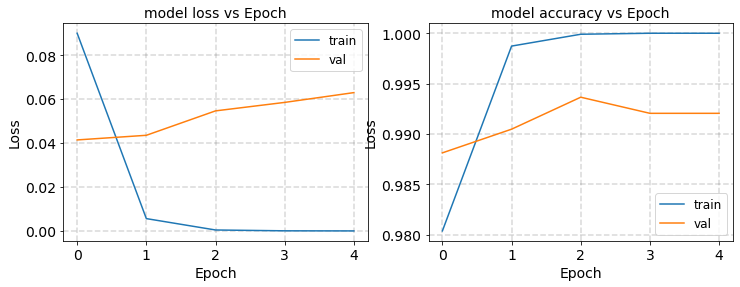

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1043 - accuracy: 0.9779 - val_loss: 0.0754 - val_accuracy: 0.9778
Epoch 2/5
1250/1250 - 3s - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.0748 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0807 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 1.6050e-04 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 5.3766e-05 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9834


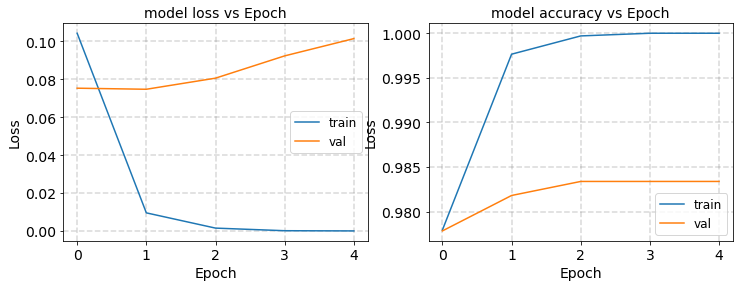

round1 [2 3 9 8]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.0657 - accuracy: 0.9894 - val_loss: 0.0545 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0567 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 1.1296e-04 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 3.5716e-05 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 1.3765e-05 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9921


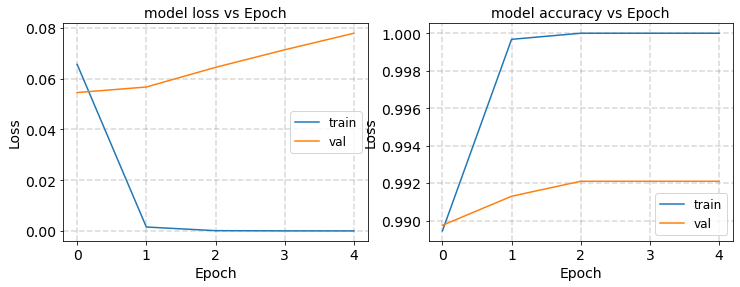

3
Epoch 1/5
1250/1250 - 4s - loss: 0.0850 - accuracy: 0.9844 - val_loss: 0.0754 - val_accuracy: 0.9833
Epoch 2/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0943 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 1.5745e-04 - accuracy: 1.0000 - val_loss: 0.1101 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 4.1836e-05 - accuracy: 1.0000 - val_loss: 0.1246 - val_accuracy: 0.9833
Epoch 5/5
1250/1250 - 4s - loss: 1.4526e-05 - accuracy: 1.0000 - val_loss: 0.1330 - val_accuracy: 0.9833


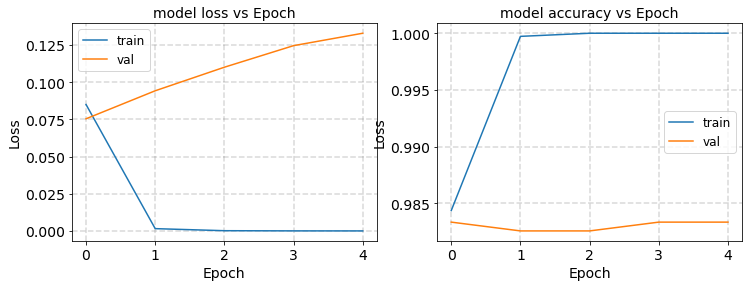

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0648 - accuracy: 0.9879 - val_loss: 0.0795 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0965 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1184 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 4s - loss: 8.1529e-05 - accuracy: 1.0000 - val_loss: 0.1356 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 1.8920e-05 - accuracy: 1.0000 - val_loss: 0.1504 - val_accuracy: 0.9866


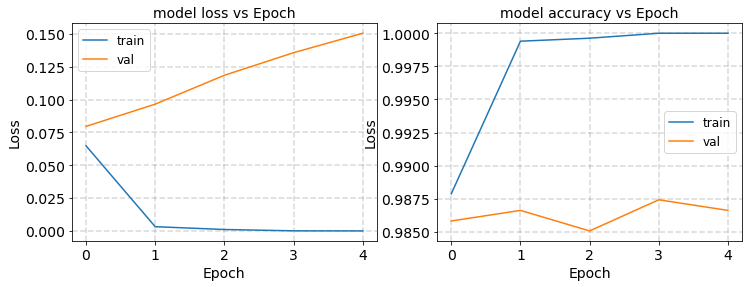

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1169 - accuracy: 0.9732 - val_loss: 0.0485 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0575 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 4s - loss: 8.2610e-04 - accuracy: 0.9999 - val_loss: 0.0749 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 1.2361e-04 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 5s - loss: 4.1032e-05 - accuracy: 1.0000 - val_loss: 0.0936 - val_accuracy: 0.9850


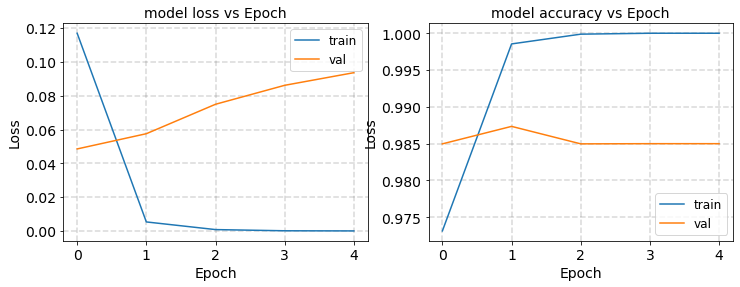

round2 [2 9 8 3]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.0990 - accuracy: 0.9835 - val_loss: 0.0527 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0670 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 2.1139e-04 - accuracy: 1.0000 - val_loss: 0.0765 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 6.0008e-05 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 1.8429e-05 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9890


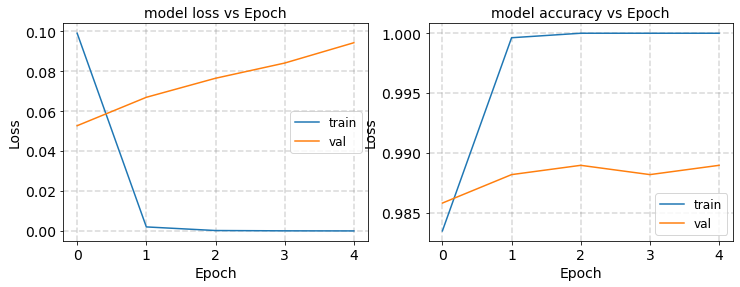

9
Epoch 1/5
1250/1250 - 5s - loss: 0.1021 - accuracy: 0.9848 - val_loss: 0.0547 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0658 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 2.7579e-04 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 5s - loss: 9.2353e-05 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 5s - loss: 3.2765e-05 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 0.9890


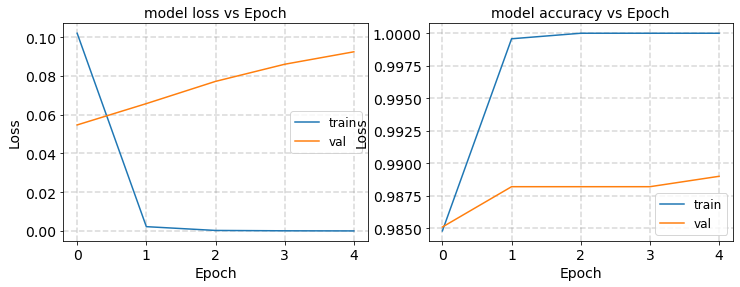

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0904 - accuracy: 0.9818 - val_loss: 0.0727 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 5s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0732 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 5s - loss: 2.1202e-04 - accuracy: 1.0000 - val_loss: 0.0913 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 5s - loss: 5.6873e-05 - accuracy: 1.0000 - val_loss: 0.0968 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 4s - loss: 1.9860e-05 - accuracy: 1.0000 - val_loss: 0.1102 - val_accuracy: 0.9857


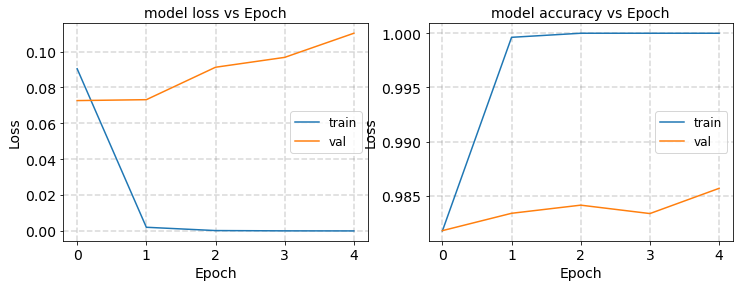

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1579 - accuracy: 0.9682 - val_loss: 0.0614 - val_accuracy: 0.9794
Epoch 2/5
1250/1250 - 4s - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0808 - val_accuracy: 0.9793
Epoch 3/5
1250/1250 - 5s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0913 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 2.0616e-04 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 5s - loss: 7.4309e-05 - accuracy: 1.0000 - val_loss: 0.1190 - val_accuracy: 0.9833


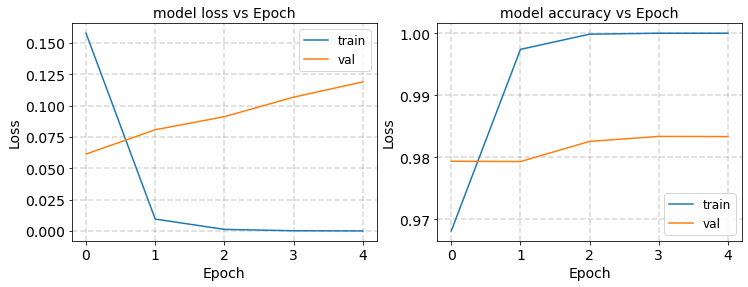

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_24 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_25 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_26 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_27 (None, 128)               32898     
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

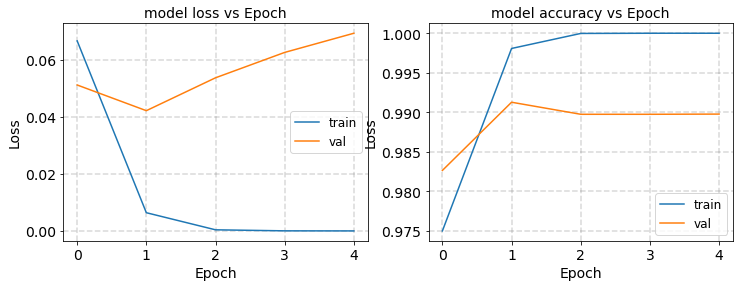

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1129 - accuracy: 0.9737 - val_loss: 0.0496 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 4s - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0445 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0496 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 1.1285e-04 - accuracy: 1.0000 - val_loss: 0.0529 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 3.6345e-05 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9905


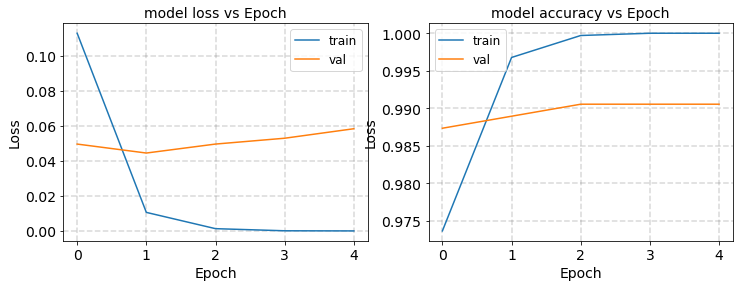

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1129 - accuracy: 0.9708 - val_loss: 0.0715 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 4s - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0752 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0933 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 6.7540e-04 - accuracy: 0.9998 - val_loss: 0.0996 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 4s - loss: 6.0034e-05 - accuracy: 1.0000 - val_loss: 0.1100 - val_accuracy: 0.9834


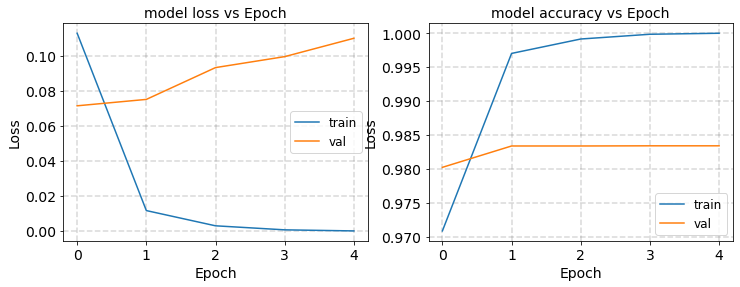

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1142 - accuracy: 0.9730 - val_loss: 0.0573 - val_accuracy: 0.9857
Epoch 2/5
1250/1250 - 3s - loss: 0.0112 - accuracy: 0.9973 - val_loss: 0.0671 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0826 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0905 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 3s - loss: 7.1248e-05 - accuracy: 1.0000 - val_loss: 0.0983 - val_accuracy: 0.9818


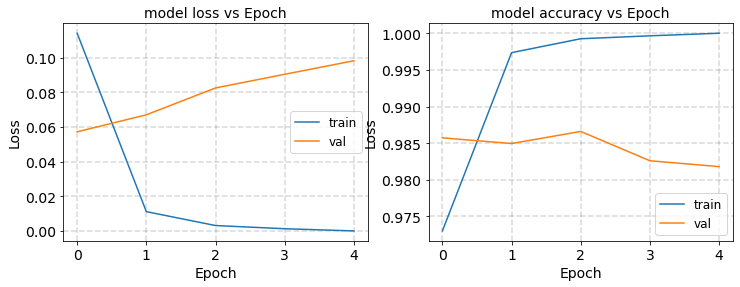

round1 [9 3 2 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0793 - accuracy: 0.9851 - val_loss: 0.0522 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0576 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 3s - loss: 2.2671e-04 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 5.5432e-05 - accuracy: 1.0000 - val_loss: 0.0736 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 1.7122e-05 - accuracy: 1.0000 - val_loss: 0.0814 - val_accuracy: 0.9890


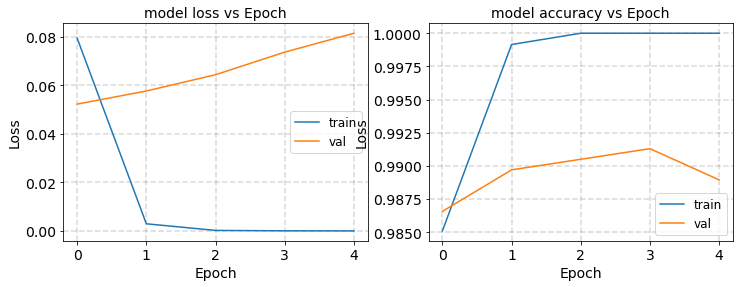

3
Epoch 1/5
1250/1250 - 3s - loss: 0.0856 - accuracy: 0.9848 - val_loss: 0.0570 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0790 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 3s - loss: 1.0945e-04 - accuracy: 1.0000 - val_loss: 0.0948 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 3.6090e-05 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 1.4675e-05 - accuracy: 1.0000 - val_loss: 0.1163 - val_accuracy: 0.9834


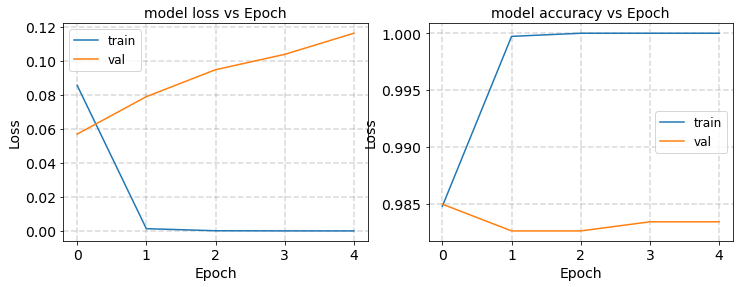

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1279 - accuracy: 0.9719 - val_loss: 0.0589 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0686 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0817 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 3.7907e-04 - accuracy: 0.9999 - val_loss: 0.0770 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 5.0167e-05 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 0.9889


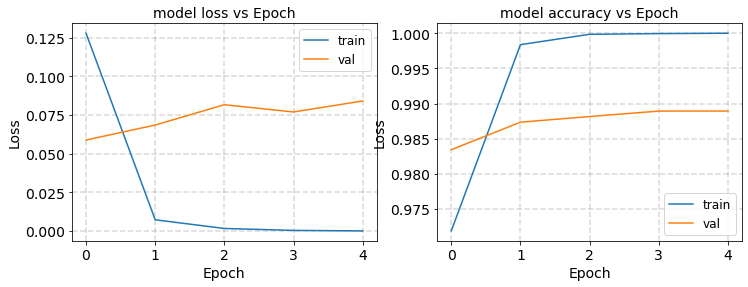

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1191 - accuracy: 0.9740 - val_loss: 0.0581 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 3s - loss: 0.0107 - accuracy: 0.9971 - val_loss: 0.0476 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0558 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 3.1321e-04 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 8.9432e-05 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9866


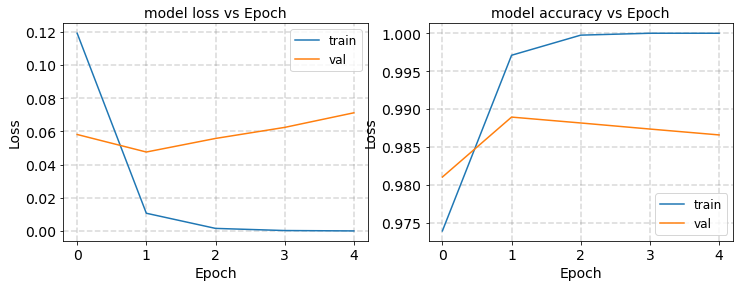

round2 [8 2 3 9]
8
Epoch 1/5
1250/1250 - 3s - loss: 3.2560e-05 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 1.3023e-05 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 5.4060e-06 - accuracy: 1.0000 - val_loss: 0.0899 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 2.3069e-06 - accuracy: 1.0000 - val_loss: 0.0939 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 9.7243e-07 - accuracy: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9874


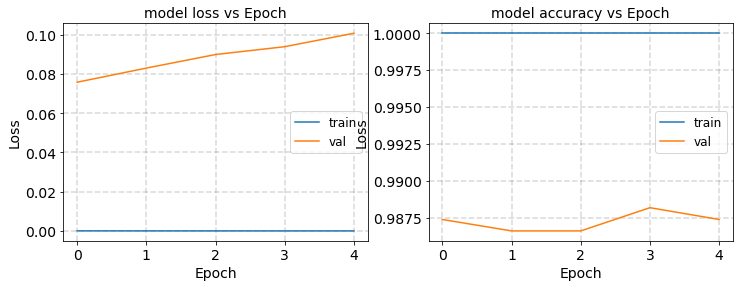

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0986 - accuracy: 0.9886 - val_loss: 0.0717 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 9.7509e-04 - accuracy: 0.9998 - val_loss: 0.0843 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 1.0528e-04 - accuracy: 1.0000 - val_loss: 0.0930 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 2.7712e-05 - accuracy: 1.0000 - val_loss: 0.1009 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 5s - loss: 1.0481e-05 - accuracy: 1.0000 - val_loss: 0.1062 - val_accuracy: 0.9873


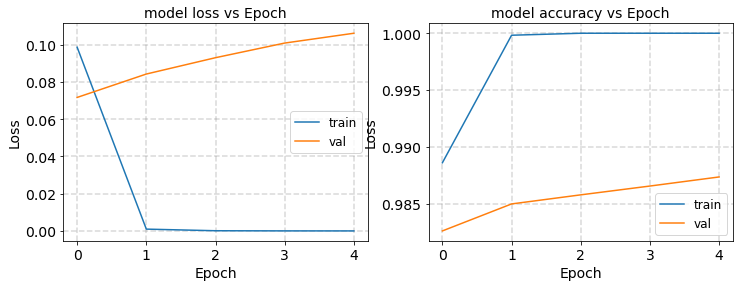

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1060 - accuracy: 0.9815 - val_loss: 0.0611 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0759 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 5s - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0772 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 6.6164e-04 - accuracy: 0.9999 - val_loss: 0.0865 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 1.6125e-04 - accuracy: 1.0000 - val_loss: 0.0912 - val_accuracy: 0.9850


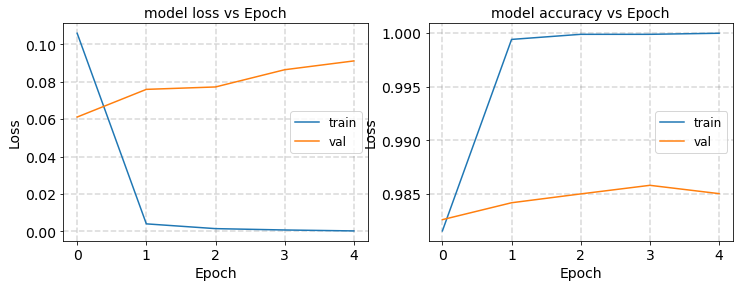

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0701 - accuracy: 0.9864 - val_loss: 0.0374 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 5s - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0407 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 8.7030e-04 - accuracy: 0.9999 - val_loss: 0.0600 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 2.7897e-04 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 4s - loss: 5.8179e-05 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9929


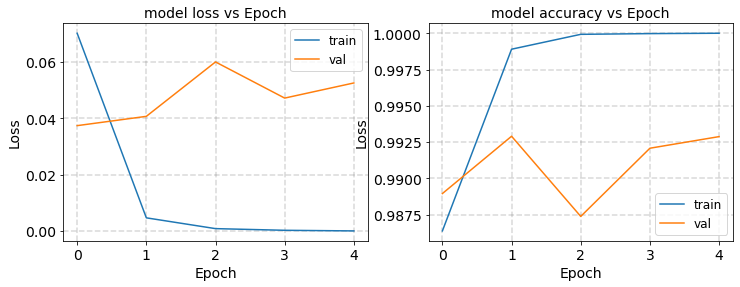

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_30 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_31 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_32 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_33 (None, 128)               32898     
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

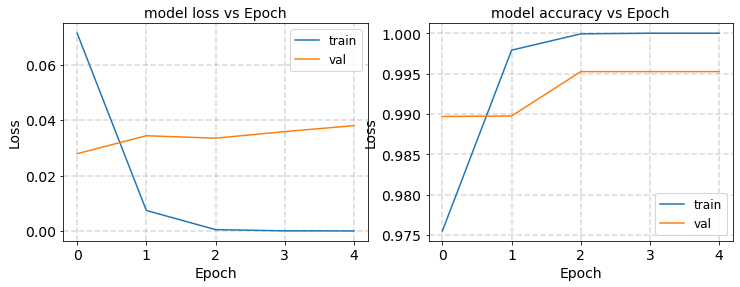

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1158 - accuracy: 0.9682 - val_loss: 0.0551 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 4s - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0638 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0972 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 1.3745e-04 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 4.0773e-05 - accuracy: 1.0000 - val_loss: 0.1189 - val_accuracy: 0.9826


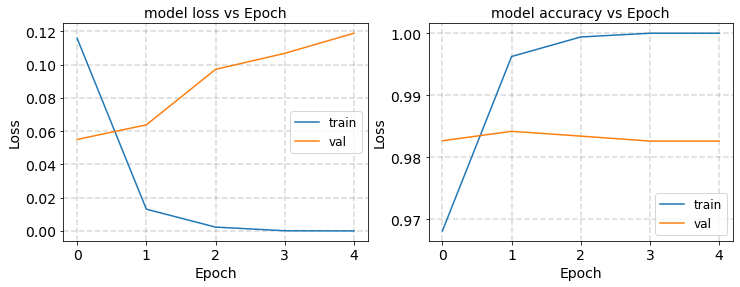

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1071 - accuracy: 0.9754 - val_loss: 0.0604 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 4s - loss: 0.0093 - accuracy: 0.9977 - val_loss: 0.0688 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 8.5671e-04 - accuracy: 0.9999 - val_loss: 0.0962 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 4s - loss: 7.9082e-05 - accuracy: 1.0000 - val_loss: 0.1058 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 4s - loss: 2.8300e-05 - accuracy: 1.0000 - val_loss: 0.1159 - val_accuracy: 0.9826


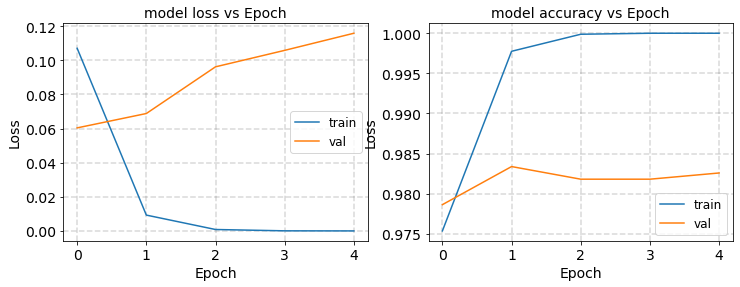

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0786 - accuracy: 0.9837 - val_loss: 0.0580 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 5s - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0719 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 5s - loss: 3.5240e-04 - accuracy: 1.0000 - val_loss: 0.0880 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 5s - loss: 7.4543e-05 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 2.7531e-05 - accuracy: 1.0000 - val_loss: 0.1138 - val_accuracy: 0.9858


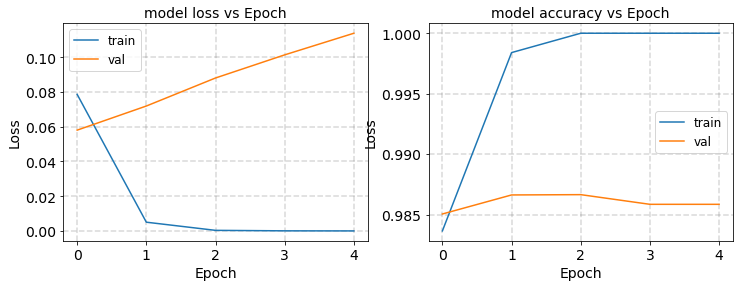

round1 [3 9 2 8]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.0938 - accuracy: 0.9800 - val_loss: 0.0609 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 5s - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0681 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0767 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 8.8562e-05 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 4s - loss: 3.0526e-05 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9842


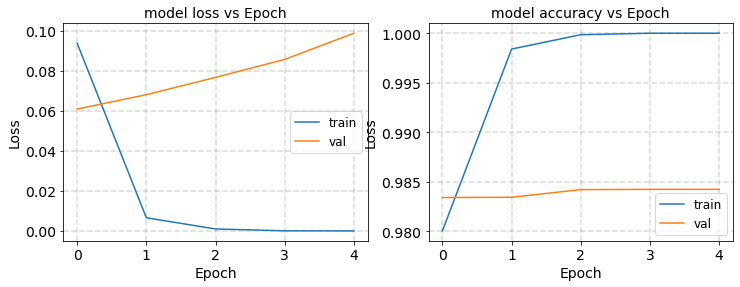

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0694 - accuracy: 0.9880 - val_loss: 0.0802 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0938 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 2.2759e-04 - accuracy: 1.0000 - val_loss: 0.1117 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 5s - loss: 6.0537e-05 - accuracy: 1.0000 - val_loss: 0.1273 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 7.7829e-06 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9874


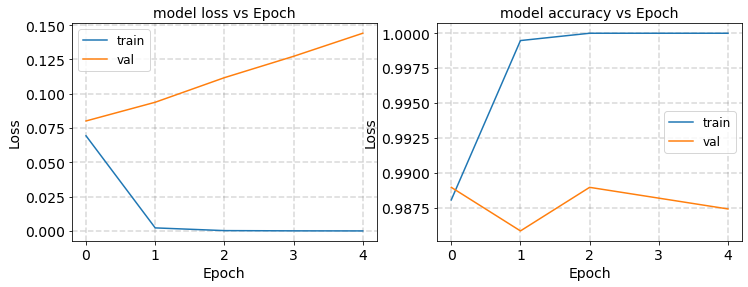

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1722 - accuracy: 0.9703 - val_loss: 0.0621 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 4s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0793 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 4s - loss: 4.8650e-04 - accuracy: 0.9999 - val_loss: 0.0862 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 4s - loss: 1.0008e-04 - accuracy: 1.0000 - val_loss: 0.0932 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 4s - loss: 3.2286e-05 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9905


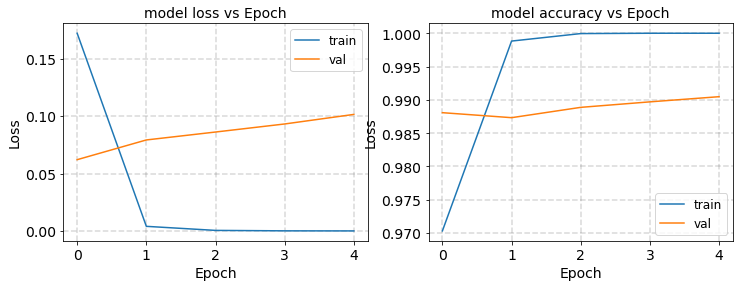

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1144 - accuracy: 0.9744 - val_loss: 0.0746 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 6s - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0895 - val_accuracy: 0.9795
Epoch 3/5
1250/1250 - 5s - loss: 8.2356e-04 - accuracy: 1.0000 - val_loss: 0.1065 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 4s - loss: 1.5534e-04 - accuracy: 1.0000 - val_loss: 0.1150 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 4s - loss: 5.2534e-05 - accuracy: 1.0000 - val_loss: 0.1306 - val_accuracy: 0.9810


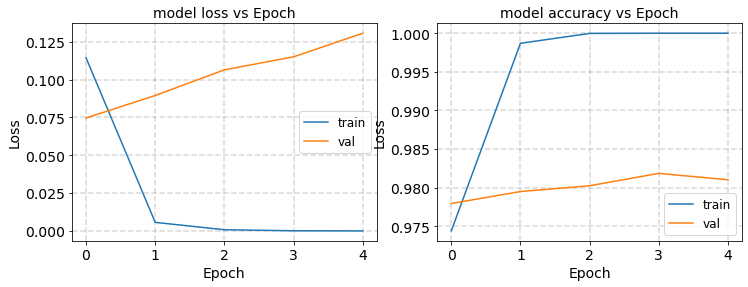

round2 [3 9 8 2]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.1365 - accuracy: 0.9690 - val_loss: 0.0801 - val_accuracy: 0.9778
Epoch 2/5
1250/1250 - 4s - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.0808 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0984 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 3s - loss: 4.1629e-04 - accuracy: 1.0000 - val_loss: 0.1100 - val_accuracy: 0.9841
Epoch 5/5
1250/1250 - 3s - loss: 1.1798e-04 - accuracy: 1.0000 - val_loss: 0.1234 - val_accuracy: 0.9833


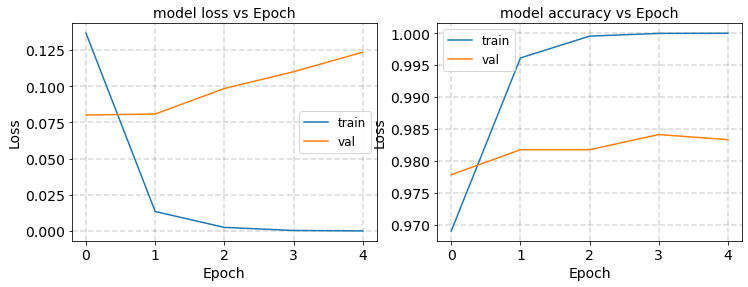

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0968 - accuracy: 0.9842 - val_loss: 0.0669 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0606 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 5.8432e-04 - accuracy: 0.9998 - val_loss: 0.0721 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 2.0596e-04 - accuracy: 0.9998 - val_loss: 0.0875 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 1.2810e-04 - accuracy: 0.9998 - val_loss: 0.0972 - val_accuracy: 0.9882


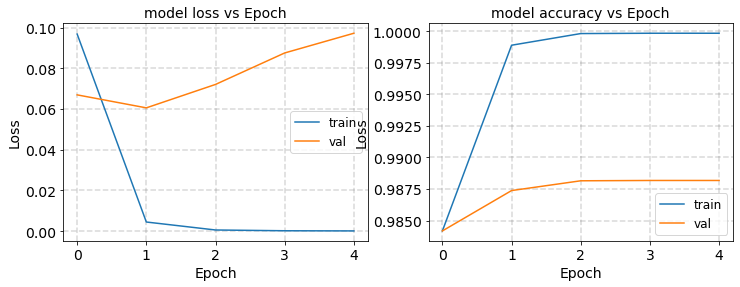

8
Epoch 1/5
1250/1250 - 4s - loss: 0.2113 - accuracy: 0.9564 - val_loss: 0.1117 - val_accuracy: 0.9787
Epoch 2/5
1250/1250 - 3s - loss: 0.0440 - accuracy: 0.9984 - val_loss: 0.1090 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 4s - loss: 0.0212 - accuracy: 0.9998 - val_loss: 0.1242 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 3s - loss: 0.0119 - accuracy: 0.9998 - val_loss: 0.1362 - val_accuracy: 0.9786
Epoch 5/5
1250/1250 - 3s - loss: 0.0071 - accuracy: 0.9998 - val_loss: 0.1373 - val_accuracy: 0.9787


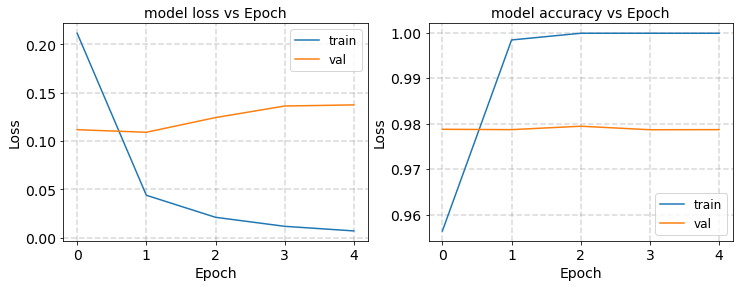

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1318 - accuracy: 0.9701 - val_loss: 0.0753 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 3s - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.0661 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0721 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 4s - loss: 2.5946e-04 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 4s - loss: 7.1221e-05 - accuracy: 1.0000 - val_loss: 0.0886 - val_accuracy: 0.9889


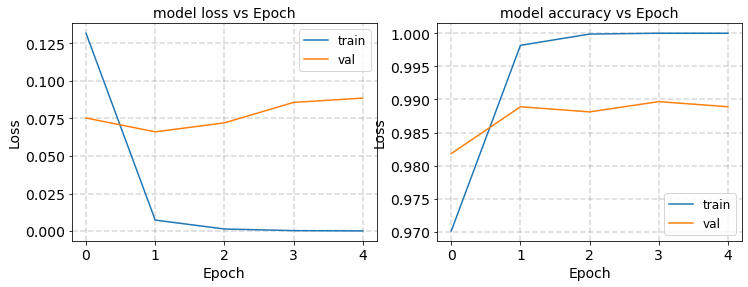

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_36 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_37 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_38 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_39 (None, 128)               32898     
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

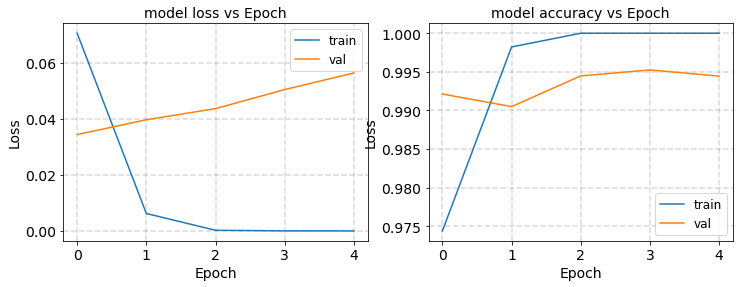

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1142 - accuracy: 0.9717 - val_loss: 0.0594 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 4s - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0735 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0982 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 5s - loss: 9.8904e-05 - accuracy: 1.0000 - val_loss: 0.1149 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 5s - loss: 3.1256e-05 - accuracy: 1.0000 - val_loss: 0.1284 - val_accuracy: 0.9842


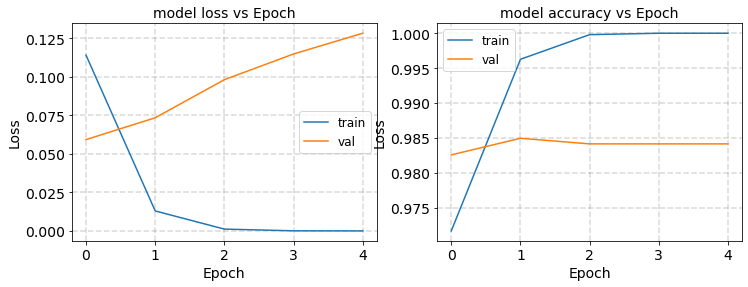

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0666 - accuracy: 0.9850 - val_loss: 0.0476 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0542 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 5s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0594 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 8.2024e-05 - accuracy: 1.0000 - val_loss: 0.0704 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 5s - loss: 2.2277e-05 - accuracy: 1.0000 - val_loss: 0.0748 - val_accuracy: 0.9913


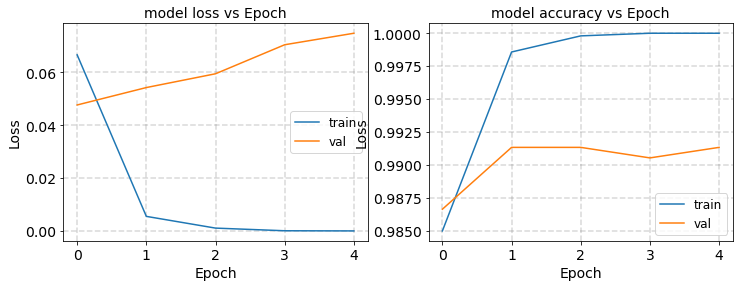

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0910 - accuracy: 0.9779 - val_loss: 0.0447 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0616 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 5s - loss: 3.4148e-04 - accuracy: 1.0000 - val_loss: 0.0708 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 7.9059e-05 - accuracy: 1.0000 - val_loss: 0.0792 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 5s - loss: 2.8677e-05 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9850


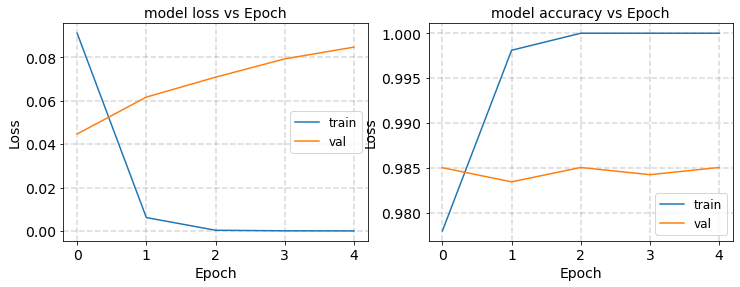

round1 [2 8 9 3]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0850 - accuracy: 0.9860 - val_loss: 0.0344 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0395 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 5s - loss: 1.5919e-04 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 5s - loss: 3.8607e-05 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 4s - loss: 1.5445e-05 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9929


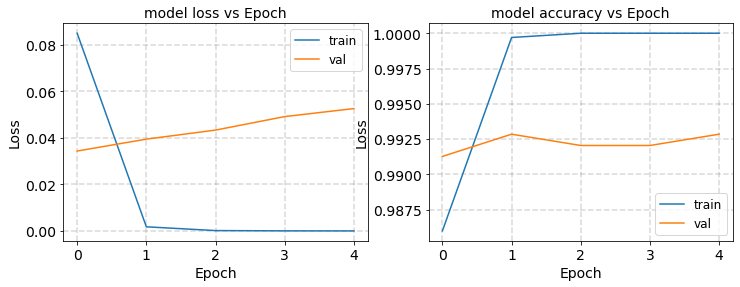

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0831 - accuracy: 0.9817 - val_loss: 0.0570 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 5s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0614 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 4s - loss: 1.7728e-04 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 4s - loss: 5.9515e-05 - accuracy: 1.0000 - val_loss: 0.0718 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 5s - loss: 2.5199e-05 - accuracy: 1.0000 - val_loss: 0.0796 - val_accuracy: 0.9865


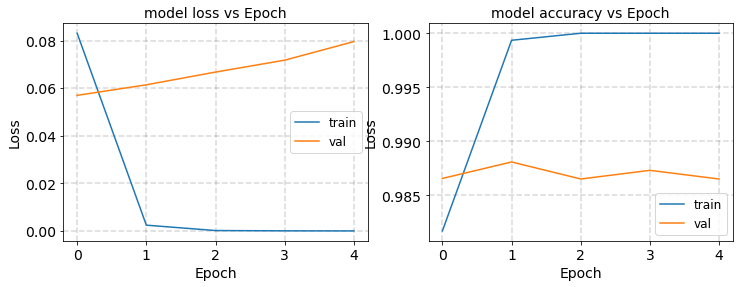

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0761 - accuracy: 0.9866 - val_loss: 0.0491 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 5s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0602 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 2.0897e-04 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 5s - loss: 5.3749e-05 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 5s - loss: 2.2343e-05 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9898


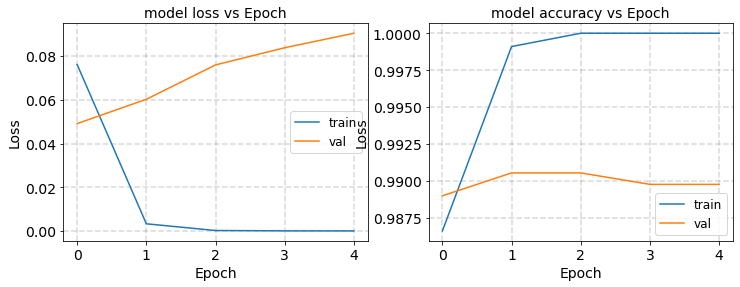

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1297 - accuracy: 0.9752 - val_loss: 0.0709 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 5s - loss: 0.0099 - accuracy: 0.9976 - val_loss: 0.0852 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.1124 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 2.4270e-04 - accuracy: 1.0000 - val_loss: 0.1270 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 4s - loss: 6.5591e-05 - accuracy: 1.0000 - val_loss: 0.1406 - val_accuracy: 0.9842


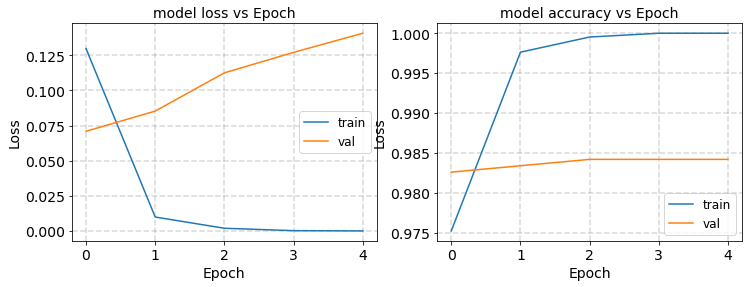

round2 [3 9 2 8]
3
Epoch 1/5
1250/1250 - 5s - loss: 2.6389e-05 - accuracy: 1.0000 - val_loss: 0.1542 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 5s - loss: 1.1016e-05 - accuracy: 1.0000 - val_loss: 0.1682 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 5s - loss: 4.4231e-06 - accuracy: 1.0000 - val_loss: 0.1825 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 1.7467e-06 - accuracy: 1.0000 - val_loss: 0.1974 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 5s - loss: 7.5322e-07 - accuracy: 1.0000 - val_loss: 0.2103 - val_accuracy: 0.9842


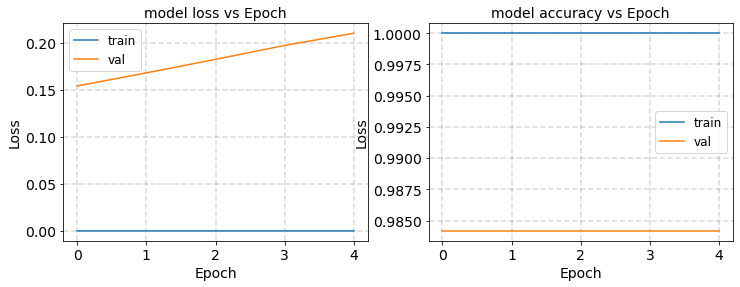

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0849 - accuracy: 0.9900 - val_loss: 0.0583 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 8.8982e-04 - accuracy: 0.9998 - val_loss: 0.0798 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 7.4178e-05 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 2.5062e-05 - accuracy: 1.0000 - val_loss: 0.1017 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 1.0765e-05 - accuracy: 1.0000 - val_loss: 0.1101 - val_accuracy: 0.9898


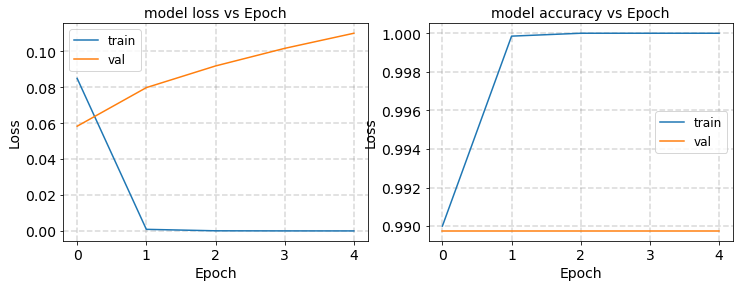

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1708 - accuracy: 0.9713 - val_loss: 0.0439 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0532 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 6.0738e-04 - accuracy: 0.9999 - val_loss: 0.0679 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 1.2552e-04 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 3.5730e-05 - accuracy: 1.0000 - val_loss: 0.0853 - val_accuracy: 0.9905


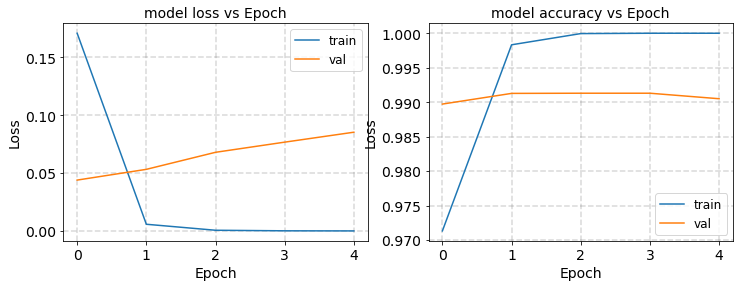

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1086 - accuracy: 0.9753 - val_loss: 0.0699 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 4s - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0852 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.1121 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 3s - loss: 3.3836e-04 - accuracy: 1.0000 - val_loss: 0.1295 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 3s - loss: 9.2974e-05 - accuracy: 1.0000 - val_loss: 0.1480 - val_accuracy: 0.9811


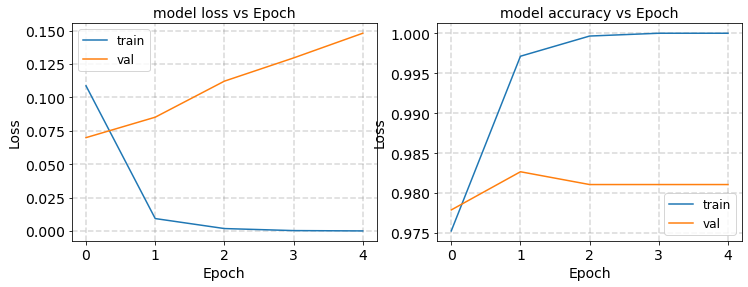

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_42 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_43 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_44 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_45 (None, 128)               32898     
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

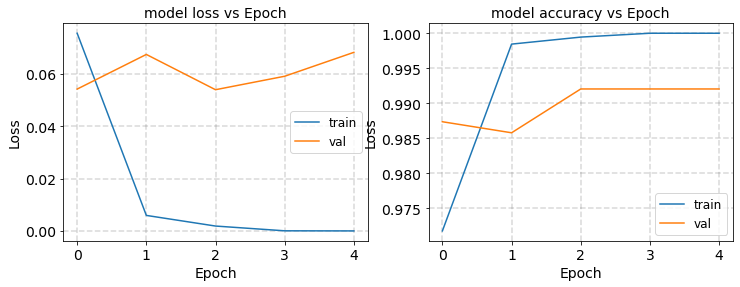

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0968 - accuracy: 0.9811 - val_loss: 0.0625 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 3s - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0647 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 3s - loss: 9.2474e-04 - accuracy: 0.9998 - val_loss: 0.0810 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 9.6098e-05 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 2.6948e-05 - accuracy: 1.0000 - val_loss: 0.1021 - val_accuracy: 0.9874


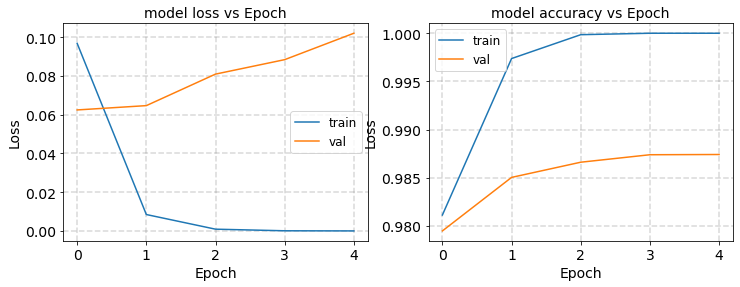

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1147 - accuracy: 0.9725 - val_loss: 0.0522 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 3s - loss: 0.0115 - accuracy: 0.9973 - val_loss: 0.0472 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 3s - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0711 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 3s - loss: 7.1207e-04 - accuracy: 0.9998 - val_loss: 0.0744 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 6.6245e-05 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9873


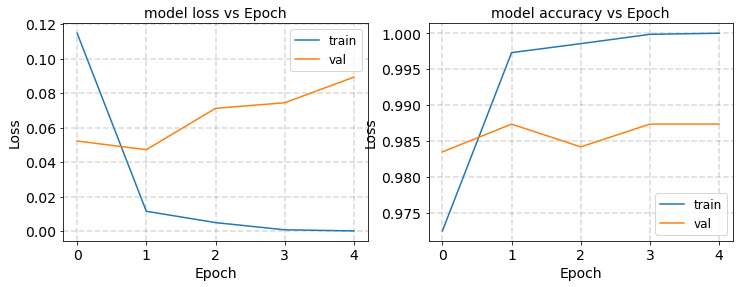

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1120 - accuracy: 0.9721 - val_loss: 0.0805 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 3s - loss: 0.0170 - accuracy: 0.9952 - val_loss: 0.0888 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.1045 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 3.1573e-04 - accuracy: 1.0000 - val_loss: 0.1261 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 6.6514e-05 - accuracy: 1.0000 - val_loss: 0.1424 - val_accuracy: 0.9858


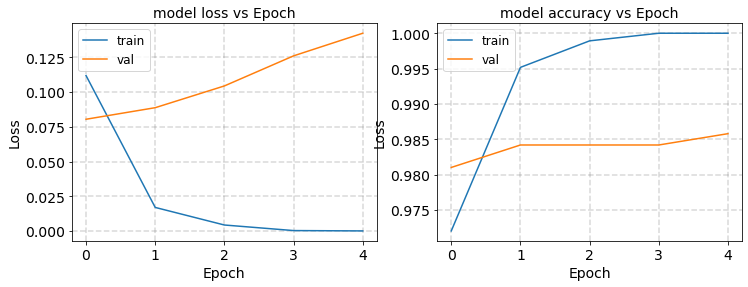

round1 [8 2 3 9]
8
Epoch 1/5
1250/1250 - 3s - loss: 0.0916 - accuracy: 0.9834 - val_loss: 0.0711 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0789 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 4s - loss: 3.2645e-04 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9802
Epoch 4/5
1250/1250 - 3s - loss: 9.7728e-05 - accuracy: 1.0000 - val_loss: 0.1006 - val_accuracy: 0.9802
Epoch 5/5
1250/1250 - 3s - loss: 4.1134e-05 - accuracy: 1.0000 - val_loss: 0.1120 - val_accuracy: 0.9810


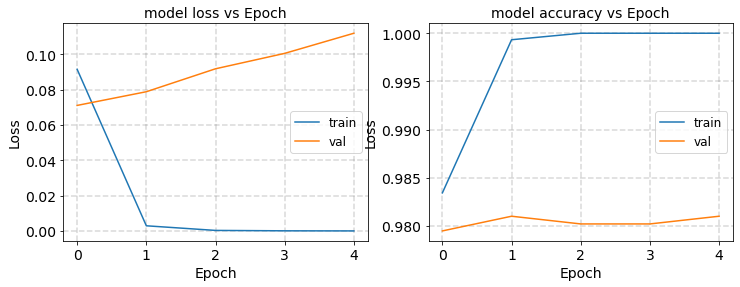

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1303 - accuracy: 0.9785 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0398 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0546 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 3.1877e-04 - accuracy: 0.9999 - val_loss: 0.0546 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 7.3637e-05 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9929


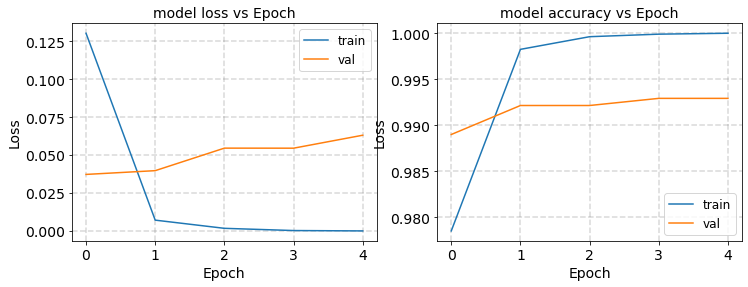

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1025 - accuracy: 0.9773 - val_loss: 0.0958 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 3s - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.1118 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 8.5526e-04 - accuracy: 0.9999 - val_loss: 0.1280 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 3s - loss: 1.4457e-04 - accuracy: 1.0000 - val_loss: 0.1414 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 3s - loss: 4.3056e-05 - accuracy: 1.0000 - val_loss: 0.1570 - val_accuracy: 0.9873


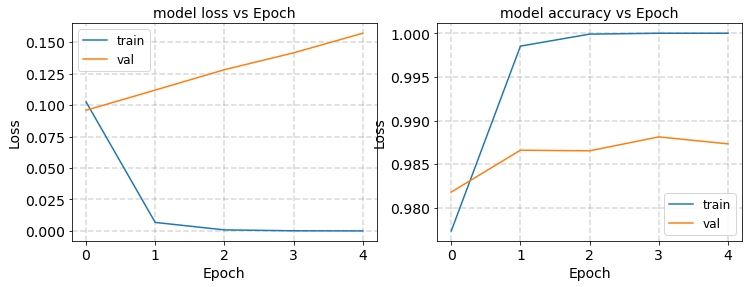

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0933 - accuracy: 0.9819 - val_loss: 0.0517 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 3s - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0593 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0866 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 3.2148e-04 - accuracy: 1.0000 - val_loss: 0.0792 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 3s - loss: 6.2938e-05 - accuracy: 1.0000 - val_loss: 0.0893 - val_accuracy: 0.9843


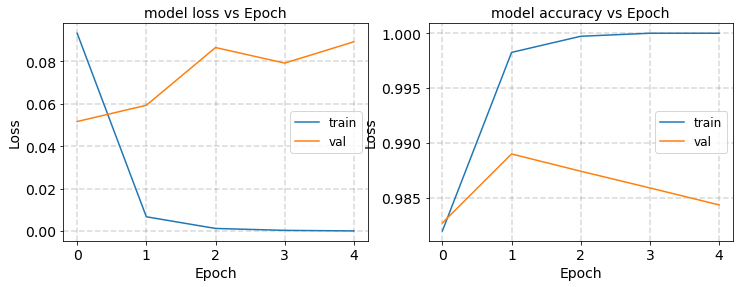

round2 [8 9 3 2]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.1065 - accuracy: 0.9757 - val_loss: 0.0579 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0792 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 3s - loss: 1.8153e-04 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 4.5621e-05 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 1.7156e-05 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9834


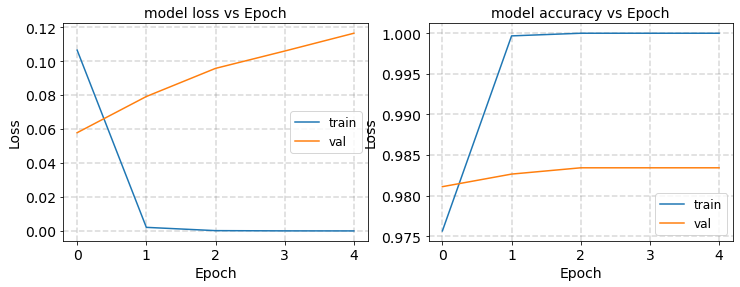

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0650 - accuracy: 0.9903 - val_loss: 0.0650 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 7.9124e-04 - accuracy: 0.9999 - val_loss: 0.0770 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 1.3214e-04 - accuracy: 1.0000 - val_loss: 0.0901 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 4.4827e-05 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 1.7635e-05 - accuracy: 1.0000 - val_loss: 0.1157 - val_accuracy: 0.9882


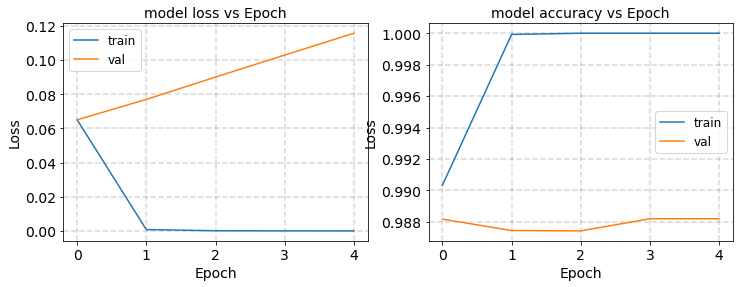

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1638 - accuracy: 0.9664 - val_loss: 0.0734 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 3s - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0.0755 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.1006 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 4.9153e-04 - accuracy: 1.0000 - val_loss: 0.1176 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 1.1904e-04 - accuracy: 1.0000 - val_loss: 0.1330 - val_accuracy: 0.9866


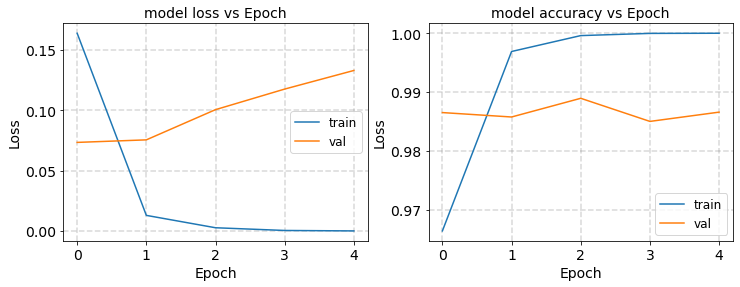

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1182 - accuracy: 0.9744 - val_loss: 0.0490 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 3s - loss: 0.0117 - accuracy: 0.9967 - val_loss: 0.0740 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0702 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0887 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 4.5271e-04 - accuracy: 0.9998 - val_loss: 0.1107 - val_accuracy: 0.9897


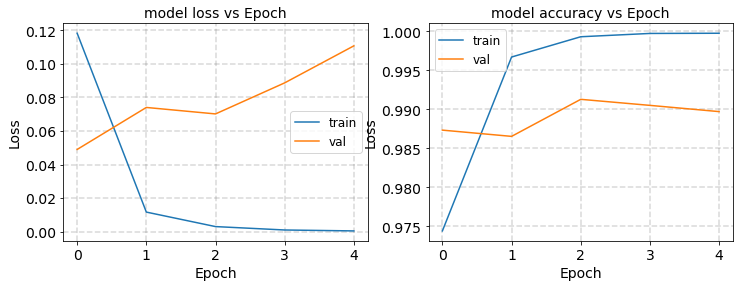

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_48 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_49 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_50 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_51 (None, 128)               32898     
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

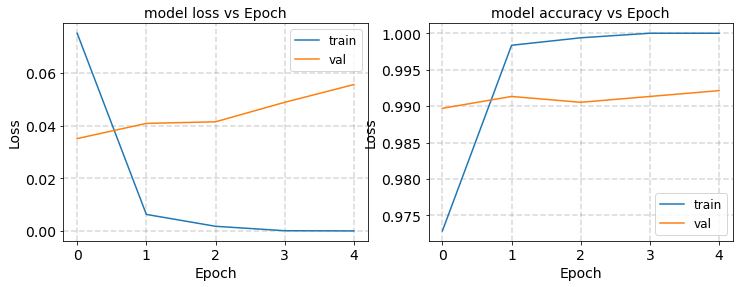

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1217 - accuracy: 0.9688 - val_loss: 0.0713 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 3s - loss: 0.0164 - accuracy: 0.9958 - val_loss: 0.0642 - val_accuracy: 0.9833
Epoch 3/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0874 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 3s - loss: 3.9421e-04 - accuracy: 0.9999 - val_loss: 0.0967 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 2s - loss: 5.1053e-05 - accuracy: 1.0000 - val_loss: 0.1042 - val_accuracy: 0.9826


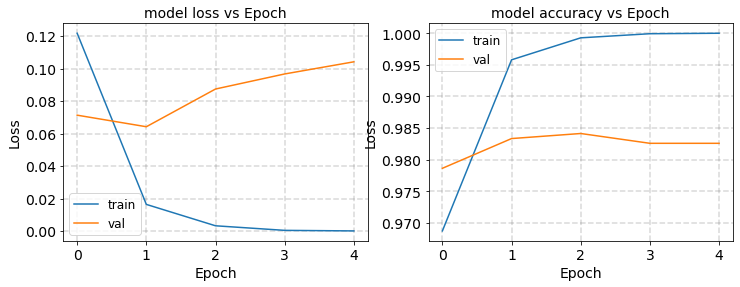

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0719 - accuracy: 0.9837 - val_loss: 0.0406 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.0493 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 3s - loss: 8.3627e-04 - accuracy: 0.9998 - val_loss: 0.0538 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 8.6739e-05 - accuracy: 1.0000 - val_loss: 0.0614 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 2.5561e-05 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9913


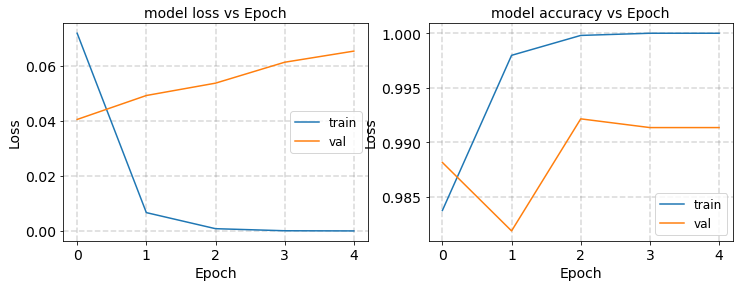

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1081 - accuracy: 0.9756 - val_loss: 0.0423 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0088 - accuracy: 0.9979 - val_loss: 0.0530 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0555 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 1.1931e-04 - accuracy: 1.0000 - val_loss: 0.0605 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 4.3539e-05 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 0.9850


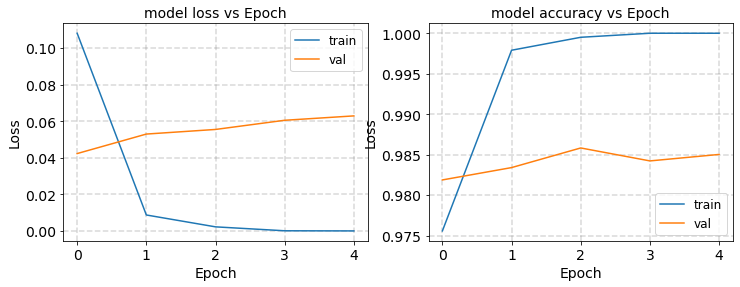

round1 [8 3 2 9]
8
Epoch 1/5
1250/1250 - 3s - loss: 1.9061e-05 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 8.3653e-06 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 3.4356e-06 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 1.1238e-06 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 3.9839e-07 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9850


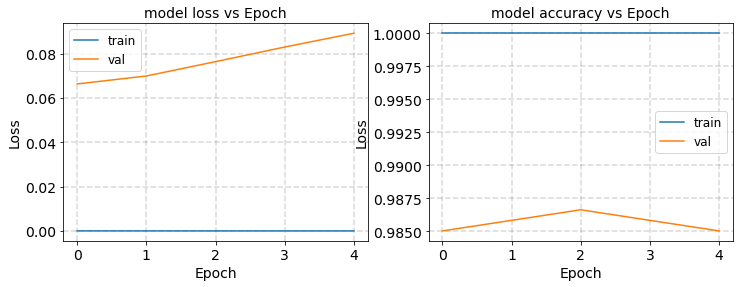

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1290 - accuracy: 0.9729 - val_loss: 0.0736 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 3s - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.1046 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 3s - loss: 7.9398e-04 - accuracy: 0.9998 - val_loss: 0.1174 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 2s - loss: 9.6086e-05 - accuracy: 1.0000 - val_loss: 0.1313 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 2s - loss: 2.7966e-05 - accuracy: 1.0000 - val_loss: 0.1437 - val_accuracy: 0.9819


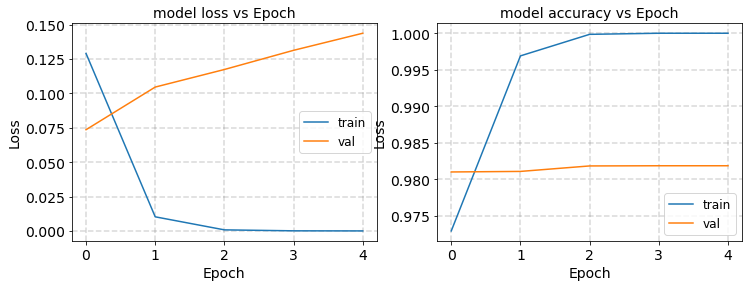

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0985 - accuracy: 0.9808 - val_loss: 0.0558 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0063 - accuracy: 0.9987 - val_loss: 0.0594 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0748 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 1.8027e-04 - accuracy: 1.0000 - val_loss: 0.0859 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 2.5920e-05 - accuracy: 1.0000 - val_loss: 0.0907 - val_accuracy: 0.9913


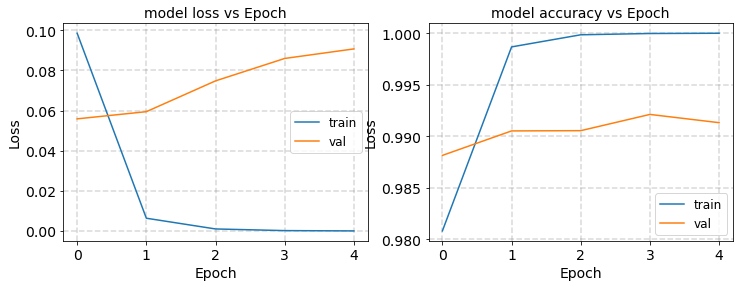

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1102 - accuracy: 0.9800 - val_loss: 0.0797 - val_accuracy: 0.9772
Epoch 2/5
1250/1250 - 3s - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0722 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0837 - val_accuracy: 0.9827
Epoch 4/5
1250/1250 - 4s - loss: 2.7930e-04 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9835
Epoch 5/5
1250/1250 - 3s - loss: 8.0149e-05 - accuracy: 1.0000 - val_loss: 0.1079 - val_accuracy: 0.9851


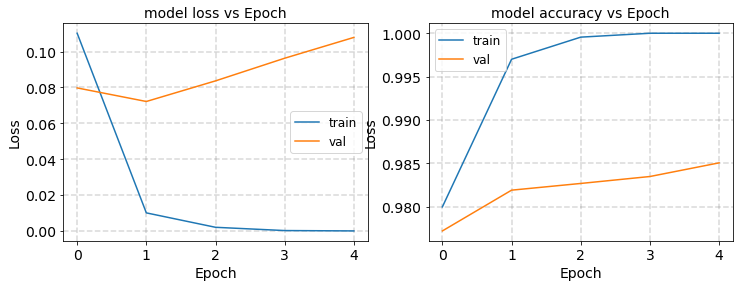

round2 [9 2 8 3]
9
Epoch 1/5
1250/1250 - 3s - loss: 2.9024e-05 - accuracy: 1.0000 - val_loss: 0.1179 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 3s - loss: 1.2311e-05 - accuracy: 1.0000 - val_loss: 0.1264 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 3s - loss: 4.9376e-06 - accuracy: 1.0000 - val_loss: 0.1376 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 3s - loss: 2.2289e-06 - accuracy: 1.0000 - val_loss: 0.1448 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 3s - loss: 1.0711e-06 - accuracy: 1.0000 - val_loss: 0.1509 - val_accuracy: 0.9843


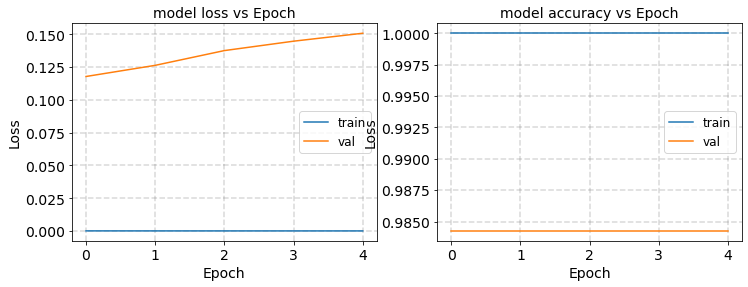

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1124 - accuracy: 0.9820 - val_loss: 0.0754 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0915 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 1.7952e-04 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 4s - loss: 5.1541e-05 - accuracy: 1.0000 - val_loss: 0.1133 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 2.3385e-05 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 0.9858


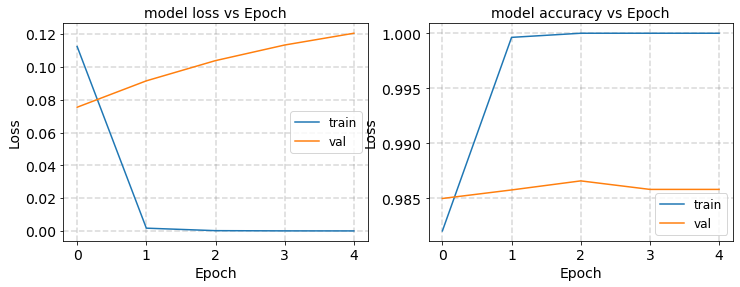

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1543 - accuracy: 0.9589 - val_loss: 0.0659 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.0937 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.1082 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 2.1577e-04 - accuracy: 1.0000 - val_loss: 0.1199 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 4.5290e-05 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 0.9842


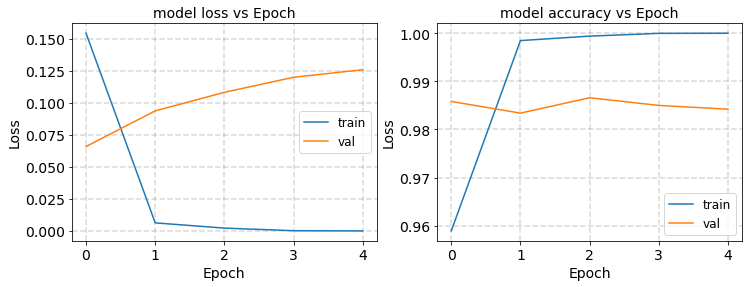

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1273 - accuracy: 0.9771 - val_loss: 0.1040 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.1245 - val_accuracy: 0.9809
Epoch 3/5
1250/1250 - 4s - loss: 4.0685e-04 - accuracy: 1.0000 - val_loss: 0.1460 - val_accuracy: 0.9833
Epoch 4/5
1250/1250 - 4s - loss: 1.1213e-04 - accuracy: 1.0000 - val_loss: 0.1611 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 4s - loss: 4.0301e-05 - accuracy: 1.0000 - val_loss: 0.1746 - val_accuracy: 0.9833


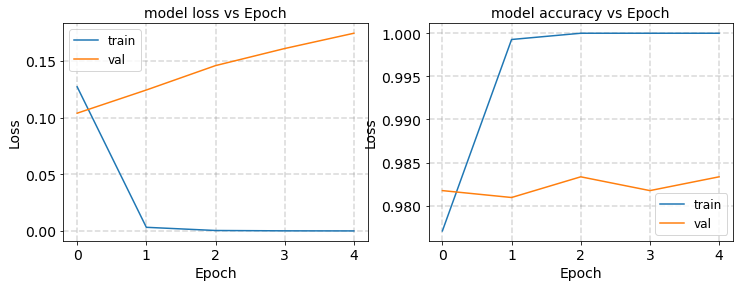

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_54 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_55 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_56 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_57 (None, 128)               32898     
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_seq_prune_08_4_128_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=128,
                                  num_output_nodes=4,
                                  pruning=0.8,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_08_4_128_run0  1.80502          1.8032      0.0275479   
2389_seq_prune_08_4_128_run1  1.91879         1.86146      0.0253015   
2389_seq_prune_08_4_128_run2  1.81601         1.81087      0.0234719   
2389_seq_prune_08_4_128_run3  1.80646         1.82921      0.0214399   
2389_seq_prune_08_4_128_run4  1.86236         1.83778       0.024388   
2389_seq_prune_08_4_128_run5  1.87434         1.86398      0.0260705   
2389_seq_prune_08_4_128_run6  1.83734         1.85929       0.019451   
2389_seq_prune_08_4_128_run7  1.79803         1.79229      0.0209979   
2389_seq_prune_08_4_128_run8  1.82305         1.82035      0.0192782   
2389_seq_prune_08_4_128_run9  1.80001         1.83015      0.0244888   

                             Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_08_4_128_run0     0.00615991         60     0.8           No   
2389_seq_prune_08_4_128_run1     0.00565758        100       0          Yes   
2389_seq_prune_08_4_128_run2     0.00524847         55     0.9           No   
2389_seq_prune_08_4_128_run3     0.00479411         15     0.3           No   
2389_seq_prune_08_4_128_run4     0.00545332         90     0.2           No   
2389_seq_prune_08_4_128_run5     0.00582955         70     0.6           No   
2389_seq_prune_08_4_128_run6     0.00434939         10     0.2           No   
2389_seq_prune_08_4_128_run7     0.00469526         70     0.6           No   
2389_seq_prune_08_4_128_run8     0.00431074         60     0.8           No   
2389_seq_prune_08_4_128_run9     0.00547586         10     0.2           No   

                             Direction  Accuracy  
2389_seq_prune_08_4_128_run0    larger  0.957325  
2389_seq_prune_08_4_128_run1    larger   0.93995  
2389_seq_prune_08_4_128_run2    larger  0.966075  
2389_seq_prune_08_4_128_run3   smaller  0.959025  
2389_seq_prune_08_4_128_run4    larger   0.95415  
2389_seq_prune_08_4_128_run5    larger   0.95025  
2389_seq_prune_08_4_128_run6   smaller  0.953325  
2389_seq_prune_08_4_128_run7    larger  0.958225  
2389_seq_prune_08_4_128_run8    larger  0.941625  
2389_seq_prune_08_4_128_run9   smaller  0.963525

#### Save dataframe

In [6]:
import pickle

with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_08_4_128_run0  1.80502          1.8032      0.0275479   
2389_seq_prune_08_4_128_run1  1.91879         1.86146      0.0253015   
2389_seq_prune_08_4_128_run2  1.81601         1.81087      0.0234719   
2389_seq_prune_08_4_128_run3  1.80646         1.82921      0.0214399   
2389_seq_prune_08_4_128_run4  1.86236         1.83778       0.024388   
2389_seq_prune_08_4_128_run5  1.87434         1.86398      0.0260705   
2389_seq_prune_08_4_128_run6  1.83734         1.85929       0.019451   
2389_seq_prune_08_4_128_run7  1.79803         1.79229      0.0209979   
2389_seq_prune_08_4_128_run8  1.82305         1.82035      0.0192782   
2389_seq_prune_08_4_128_run9  1.80001         1.83015      0.0244888   

                             Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_08_4_128_run0     0.00615991         60     0.8           No   
2389_seq_prune_08_4_128_run1     0.00565758        100       0          Yes   
2389_seq_prune_08_4_128_run2     0.00524847         55     0.9           No   
2389_seq_prune_08_4_128_run3     0.00479411         15     0.3           No   
2389_seq_prune_08_4_128_run4     0.00545332         90     0.2           No   
2389_seq_prune_08_4_128_run5     0.00582955         70     0.6           No   
2389_seq_prune_08_4_128_run6     0.00434939         10     0.2           No   
2389_seq_prune_08_4_128_run7     0.00469526         70     0.6           No   
2389_seq_prune_08_4_128_run8     0.00431074         60     0.8           No   
2389_seq_prune_08_4_128_run9     0.00547586         10     0.2           No   

                             Direction  Accuracy  
2389_seq_prune_08_4_128_run0    larger  0.957325  
2389_seq_prune_08_4_128_run1    larger   0.93995  
2389_seq_prune_08_4_128_run2    larger  0.966075  
2389_seq_prune_08_4_128_run3   smaller  0.959025  
2389_seq_prune_08_4_128_run4    larger   0.95415  
2389_seq_prune_08_4_128_run5    larger   0.95025  
2389_seq_prune_08_4_128_run6   smaller  0.953325  
2389_seq_prune_08_4_128_run7    larger  0.958225  
2389_seq_prune_08_4_128_run8    larger  0.941625  
2389_seq_prune_08_4_128_run9   smaller  0.963525

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[-0.        ,  0.        ,  0.07134228, ...,  0.06914739,
         0.        , -0.        ],
       [ 0.        ,  0.06555132, -0.07191958, ...,  0.        ,
         0.        ,  0.07187613],
       [-0.        ,  0.        ,  0.        , ...,  0.07873935,
         0.        , -0.        ],
       ...,
       [-0.        , -0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [-0.        ,  0.        , -0.        , ...,  0.        ,
        -0.        , -0.        ]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.8050207953355186
1.803198101281012
0.027547932893155144
0.006159905058869735
60.0
0.8
No
larger
0.9573249816894531
